# Problem Statement

* Recent Covid-19 Pandemic has raised alarms over one of the most overlooked areas to focus: Healthcare Management. While healthcare management has various use cases for using data science, **patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital**. This parameter helps hospitals to identify **patients of high LOS risk (patients who will stay longer) at the time of admission**. Once identified, patients with high LOS risk can have their **treatment plan optimized to minimize LOS and lower the chance of staff/visitor infection**. Also, prior knowledge of **LOS can aid(help) in logistics such as room and bed allocation planning**. 
* The task is to **accurately predict the Length of Stay for each patient on case-by-case basis** so that the Hospitals can use this information **for optimal resource allocation and better functioning.**

* Suppose you have been hired as Data Scientist of **HealthMan – a not for profit organization dedicated to manage the functioning of Hospitals in a professional and optimal manner**.

* **The task is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning**. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.

* **Additional Information**
* A non-profit hospital is a hospital that does not make profits for owners of the hospital from the funds collected for patient services. The owners of non-profit hospitals are often a charitable organization or non-profit corporations. Fees for service above the cost of service are reinvested in the hospital. Other funding types for hospitals include public hospitals and for-profit hospitals.

### Information About The Variables

**Column	                                                      Description**
* case_id	>>>>>>>>                                               Case_ID registered in Hospital
* Hospital_code	 >>>>>>>>>>>>                                           Unique code for the Hospital
* Hospital_type_code>>>>>>>>>>>>>>	                                   Unique code for the type of Hospital
* City_Code_Hospital>>>>>>>>>>	                                       City Code of the Hospital
* Hospital_region_code	>>>>>>>>>>>>                                      Region Code of the Hospital
* Available Extra Rooms in Hospital	>>>>>>>>            Number of Extra rooms available in the Hospital
* Department	>>>>>>>>>>>                                              Department overlooking the case
* Ward_Type	 >>>>>>>>>>>>>>                                                       Code for the Ward type
* Ward_Facility_Code	>>>>>>>>>>                                         Code for the Ward Facility
* Bed Grade	      >>>>>>>>>>>>>>>                                             Condition of Bed in the Ward
* patientid    >>>>>>>>>>>>>>>>>                                  	                Unique Patient Id
* City_Code_Patient	>>>>>>>>>>>>>>>                                            City Code for the patient
* Type of Admission	  >>>>>>>>>>>>>>>>>>>                                     Admission Type registered by the Hospital
* Severity of Illness  >>>>>>>>>>>>>>	                            Severity of the illness recorded at the time of admission
* Visitors with Patient	 >>>>>>>>>>                                        Number of Visitors with the patient
* Age	>>>>>>>>>>>>>                                                             Age of the patient
* Admission_Deposit	>>>>>>>>>>>>>                                             Deposit at the Admission Time

* Stay >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>Stay Days by the patient(**Target Variable**)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,\
StackingClassifier,VotingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,cohen_kappa_score,f1_score,log_loss

In [3]:
train=pd.read_csv(r"C:\Users\ASUS\Desktop\Capstone Project\Dataset\train_kaggle.csv")
test=pd.read_csv(r"C:\Users\ASUS\Desktop\Capstone Project\Dataset\test_kaggle.csv")

In [4]:
train.shape,test.shape

((318438, 18), (137057, 17))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137057 entries, 0 to 137056
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            137057 non-null  int64  
 1   Hospital_code                      137057 non-null  int64  
 2   Hospital_type_code                 137057 non-null  object 
 3   City_Code_Hospital                 137057 non-null  int64  
 4   Hospital_region_code               137057 non-null  object 
 5   Available Extra Rooms in Hospital  137057 non-null  int64  
 6   Department                         137057 non-null  object 
 7   Ward_Type                          137057 non-null  object 
 8   Ward_Facility_Code                 137057 non-null  object 
 9   Bed Grade                          137022 non-null  float64
 10  patientid                          137057 non-null  int64  
 11  City_Code_Patient                  1349

In [7]:
# Missing Value in Train Dataset
train.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
# Missing Value in Test Dataset
test.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                              35
patientid                               0
City_Code_Patient                    2157
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
dtype: int64

In [9]:
# Combine Both Train and Test Dataset for Further Analysis

combine=pd.concat([train,test],ignore_index=True)

In [10]:
combine.head(10)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40


In [11]:
# Percentage of Missing Value present in Each Attributes,Except the Target

(combine.isnull().sum()/combine.shape[0])*100

case_id                               0.000000
Hospital_code                         0.000000
Hospital_type_code                    0.000000
City_Code_Hospital                    0.000000
Hospital_region_code                  0.000000
Available Extra Rooms in Hospital     0.000000
Department                            0.000000
Ward_Type                             0.000000
Ward_Facility_Code                    0.000000
Bed Grade                             0.032492
patientid                             0.000000
City_Code_Patient                     1.468512
Type of Admission                     0.000000
Severity of Illness                   0.000000
Visitors with Patient                 0.000000
Age                                   0.000000
Admission_Deposit                     0.000000
Stay                                 30.089683
dtype: float64

In [12]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455495 entries, 0 to 455494
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            455495 non-null  int64  
 1   Hospital_code                      455495 non-null  int64  
 2   Hospital_type_code                 455495 non-null  object 
 3   City_Code_Hospital                 455495 non-null  int64  
 4   Hospital_region_code               455495 non-null  object 
 5   Available Extra Rooms in Hospital  455495 non-null  int64  
 6   Department                         455495 non-null  object 
 7   Ward_Type                          455495 non-null  object 
 8   Ward_Facility_Code                 455495 non-null  object 
 9   Bed Grade                          455347 non-null  float64
 10  patientid                          455495 non-null  int64  
 11  City_Code_Patient                  4488

In [13]:
combine.Stay.value_counts()

21-30                 87491
11-20                 78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

In [14]:
num_cols=combine.select_dtypes(include=np.number).columns.to_list()
cat_cols=combine.select_dtypes(include='object').columns.to_list()

In [15]:
print('Numerical Columns:',num_cols)
print()
print('Categorical Columns:',cat_cols)

Numerical Columns: ['case_id', 'Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']

Categorical Columns: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay']


* **As we know the case_id is a numerical columns but its consist of much more unique values so,we remove from the list for further analysis**
* **Bed grade is a categorical column,we change its dtypes to object to include in categorical columns**
* **Patientid is also consist of huge distinct id,so we remove its for further analysis**


In [16]:
num_cols=['Hospital_code', 'City_Code_Hospital', 'Available Extra Rooms in Hospital', 'City_Code_Patient', 'Visitors with Patient', 'Admission_Deposit']

In [17]:
cat_cols= ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 
           'Type of Admission', 'Severity of Illness', 'Age', 'Stay','Bed Grade']

In [18]:
len(num_cols)

6

In [19]:
len(cat_cols)

10

In [20]:
combine.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

In [21]:
combine.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

### Lets Do Univariante Analysis

## Univariante analysis for Numerical Columns

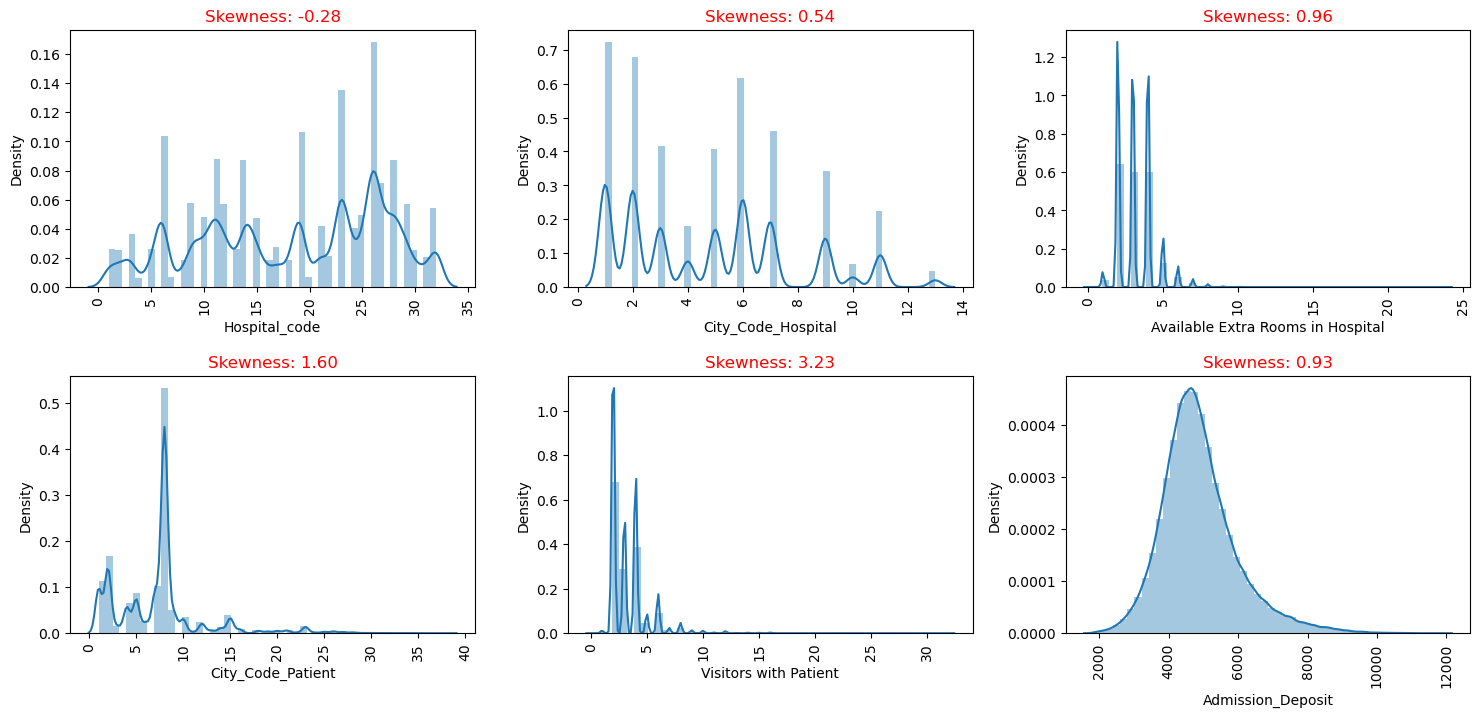

In [22]:
%matplotlib inline
# Uni variate
ncols=3
nrows=3
rep=1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.distplot(combine.loc[:,i])
    rep+=1
    plt.xticks(rotation=90)
    plt.xlabel(i,loc='center')
    plt.title('Skewness: %.2f'%combine[i].skew(),color='red')
plt.tight_layout()
plt.show()
  

### Observations  of numerical columns from the above Distribution Plot:
* Variables which are highly Postive skewed are as 'Visitor with       Patient','City_Code_Patient','Admission_Deposit','Available_extra_room'.

* Variables except Admission_Deposit,from the above analysis shows MultiModal Distributions.
* Most of the Admission deposit amount are varies in the range of (2000 to 8000).

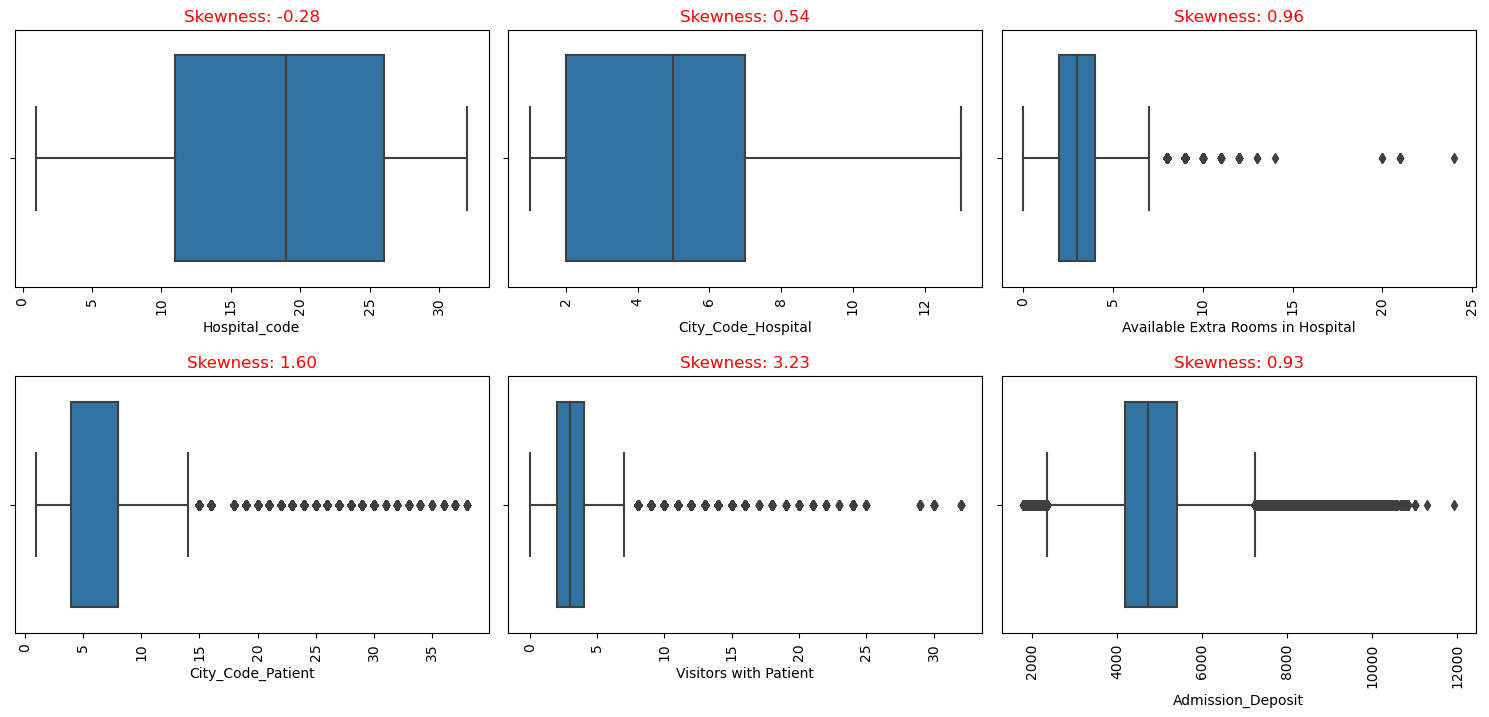

In [23]:
%matplotlib inline
# Uni variate
ncols=3
nrows=3
rep=1
plt.figure(figsize=(15,10))
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(combine.loc[:,i])
    rep+=1
    plt.xticks(rotation=90)
    plt.xlabel(i,loc='center')
    plt.title('Skewness: %.2f'%combine[i].skew(),color='red')
plt.tight_layout()
plt.show()

### Observation of numerical columns from the above Boxplot:
* Features like Admission_deposit,Visitors with Patient,City_Code_Patient,Available Extra rooms contains Outliers

## Univariant analysis of categorical columns

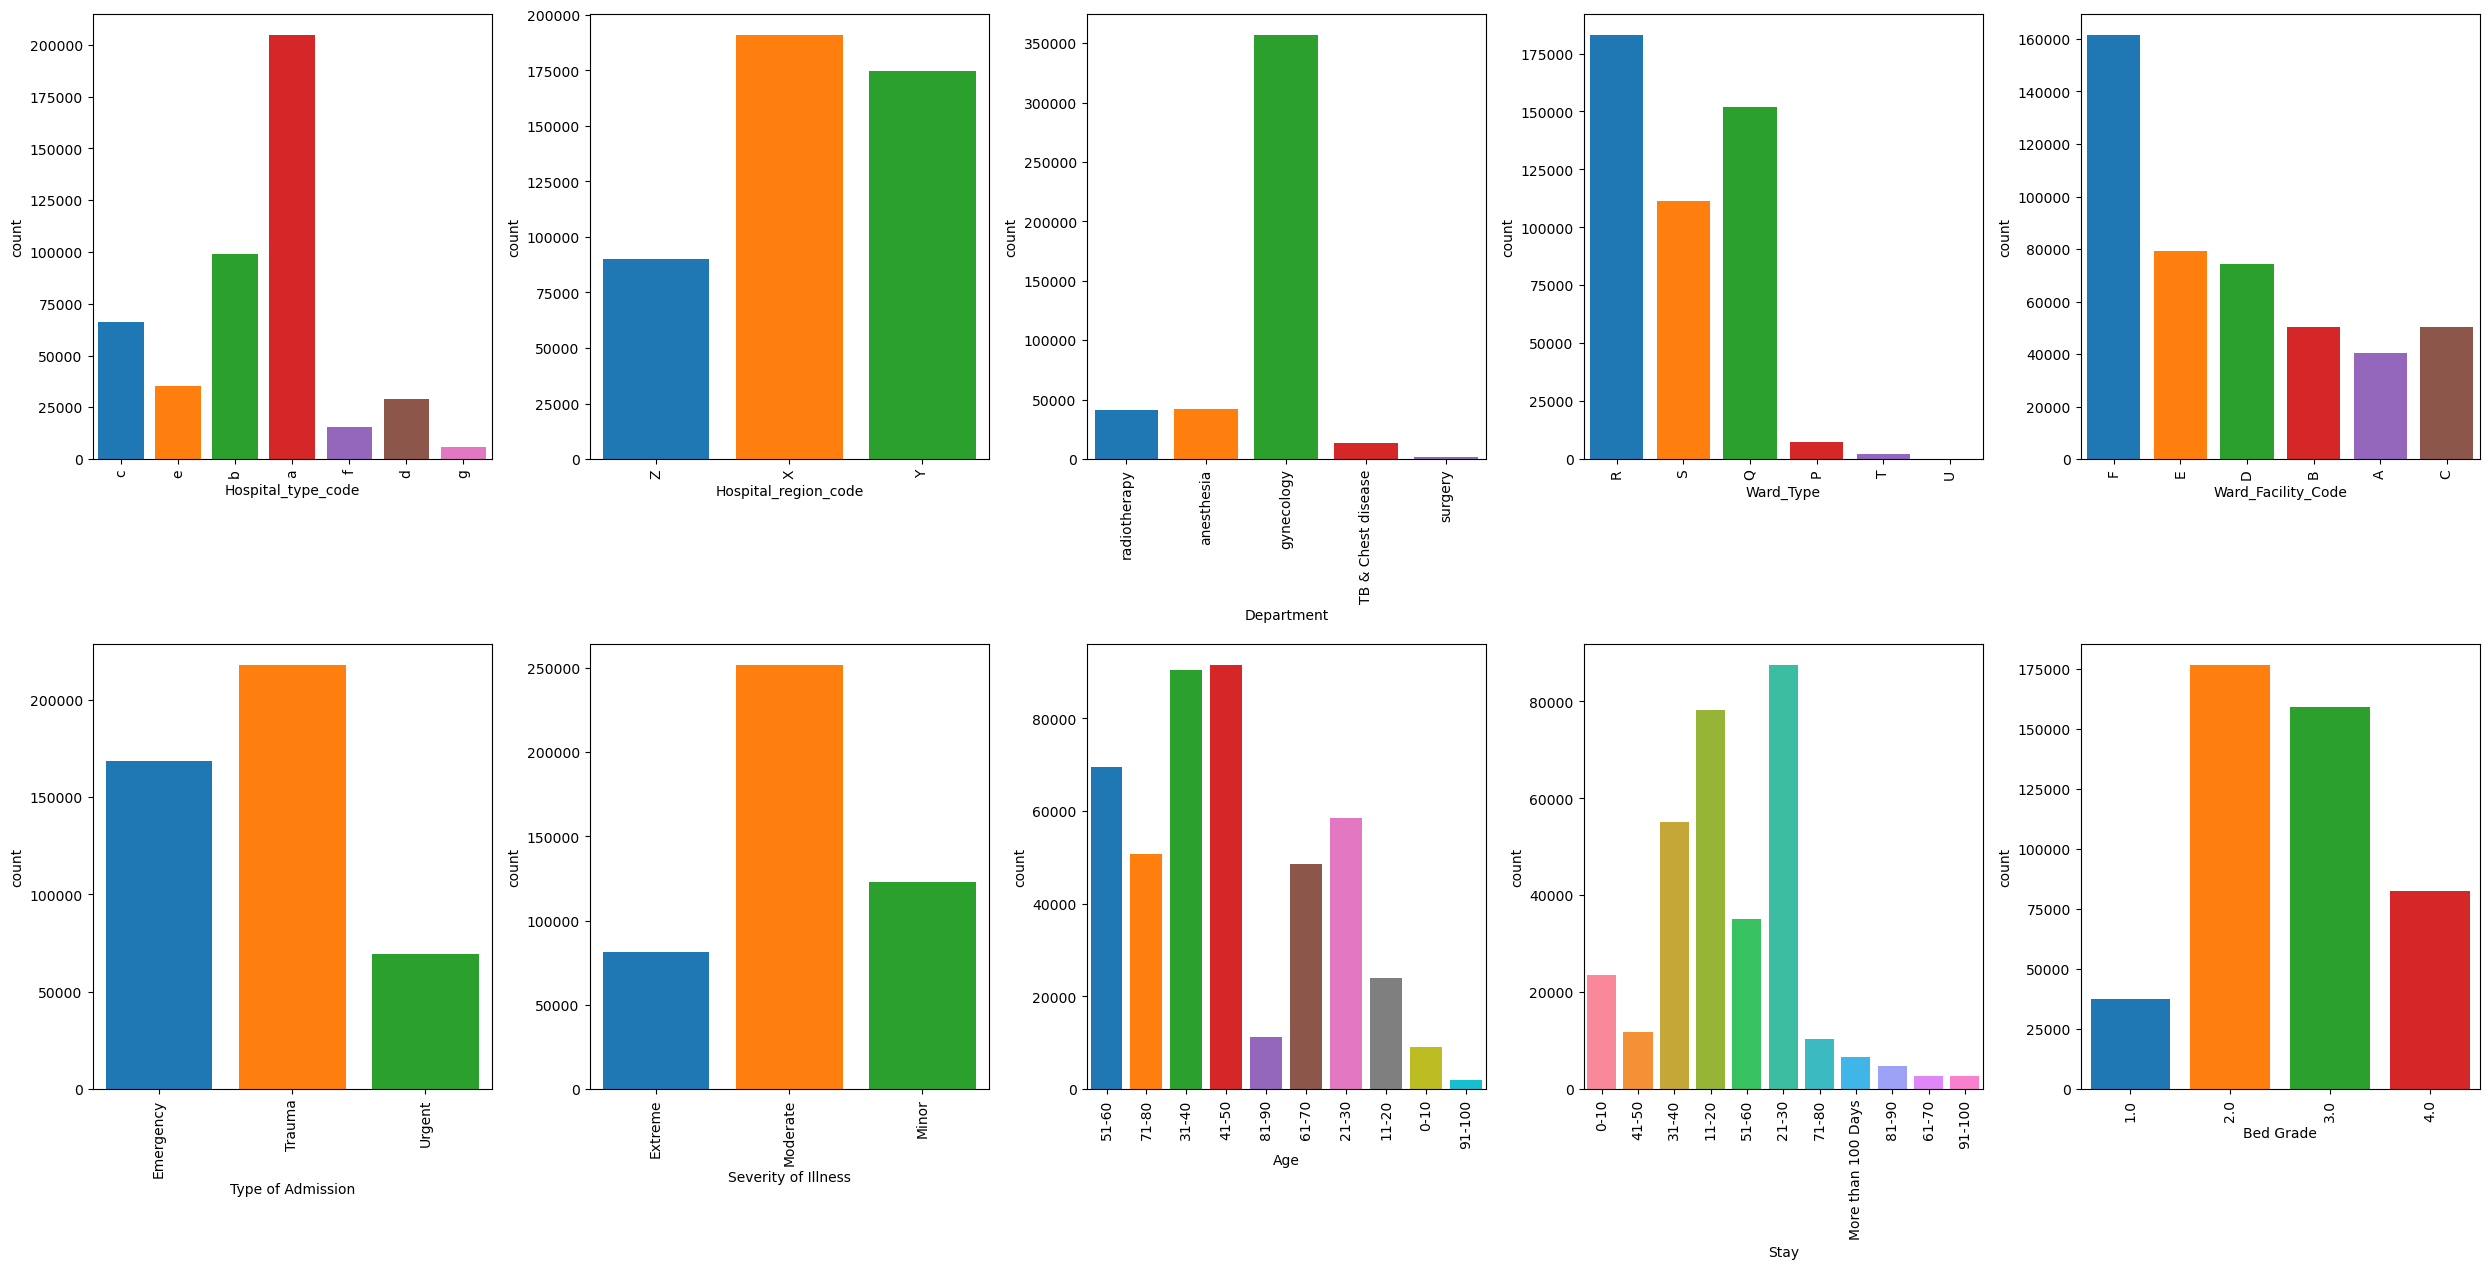

In [24]:
ncols=5
nrows=5
rep=1
plt.figure(figsize=(25,30))
for i in cat_cols:
    plt.subplot(nrows,ncols,rep)
    sns.countplot(combine.loc[:,i],saturation=5)
    rep+=1
    plt.xticks(rotation=90)
    plt.xlabel(i,loc='center')
plt.tight_layout()
plt.show()

### Obseraviton of  Categorical Columns from the above Countplot:
* Most of the Hospital_type_code are of 'a'.
* Most of the are in the Hospital Region code 'X'.
* Most of the paitentes are belongs to Gynocology Department.
* Most paitents are preferd ward_type 'R'
* Most paitents are preferd ward_facilty_code 'F'
* Maximum Type of admission are of 'Trauma' category
* Most of the paitents are in Moderate Severity of illness.
* Most of the paitents age are lies in between range (31 to 50).
* Most preferd bed by paitents are Bed grade 2.0 Category

<AxesSubplot:>

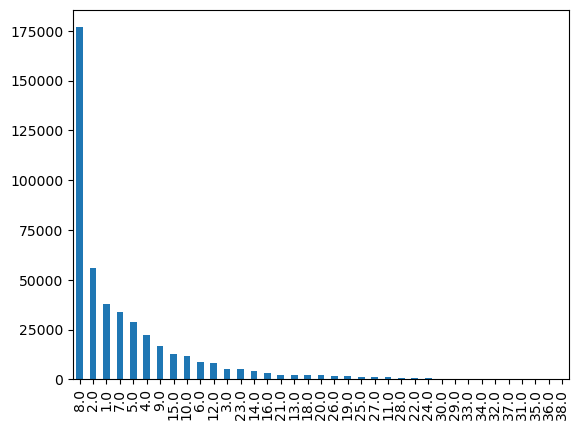

In [25]:
combine['City_Code_Patient'].value_counts().plot(kind='bar')

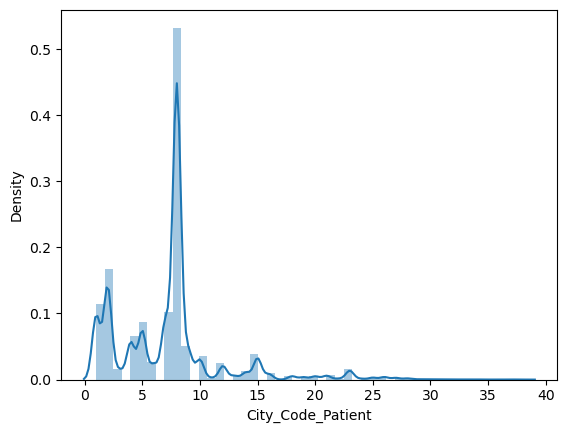

In [26]:
sns.distplot(combine.City_Code_Patient)
plt.show()
# most of the patiebnts who  are admitted in hospital belongs to city code 8:

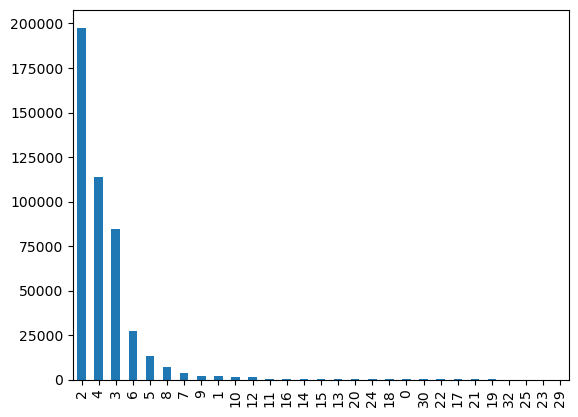

In [27]:
combine['Visitors with Patient'].value_counts().plot(kind='bar')
plt.show()
# most of the patients who are admitted in hospital have 2 Visitors

## BI-Variante Analysis:

### Numeric vs Categoric(Target):-

In [28]:
ncols=2
nrows=3
rep=1
plt.figure(figsize=(30,20),dpi=300)
for i in num_cols:
    plt.subplot(nrows,ncols,rep)
    sns.boxplot(combine.Stay,combine.loc[:,i],saturation=5)
    rep+=1
    plt.xticks(rotation=90,fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('Stay',fontsize=40)
    plt.ylabel(i,fontsize=30)
    
plt.tight_layout()
plt.show()

* **As from the above box plot the relation can not seen clearly so lets do the analysis one by one**

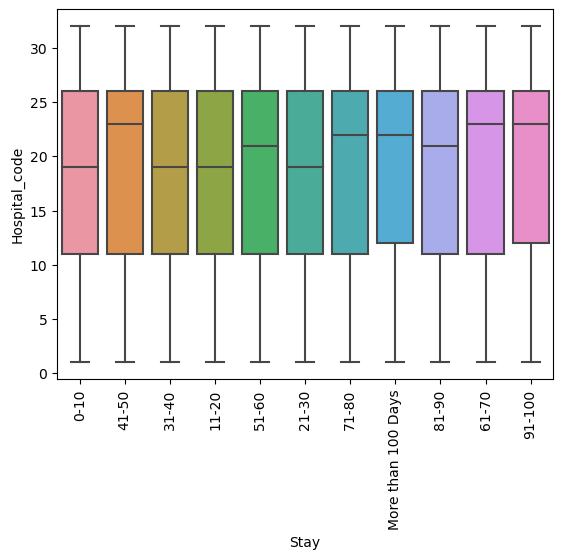

In [29]:
# Hospital_code vs Stay
sns.boxplot(combine['Stay'],combine.Hospital_code)
plt.xticks(rotation=90)
plt.show()

# Hypothesis:From the below plot i can say that Hospital_code has some relation with Stay

In [30]:
imp_feature=[]
for i in num_cols:
    var=combine.groupby(['Stay'])[i].apply(list)
    test_stats,pvalue=stats.f_oneway(*var)
    if pvalue<0.05:
        imp_feature.append(i)
        print('pavlue of %s'%i,'=',pvalue)

pavlue of Hospital_code = 2.469191989353715e-177
pavlue of City_Code_Hospital = 1.938323785570008e-219
pavlue of Available Extra Rooms in Hospital = 0.0
pavlue of Visitors with Patient = 0.0
pavlue of Admission_Deposit = 0.0


In [31]:
# Lets prove the above hypothesis Statistically
# As its Cat(>2) vs Num,so i will use annova
# Ho: Hospital_code has no correaltion with Target
# Ha: Hospital_code has realtion with Target
stay_wise_hosipital_code_list=combine.groupby(['Stay'])['Hospital_code'].apply(list)
stats.f_oneway(*stay_wise_hosipital_code_list)

# As the Pvalue is less than 0.05 so we reject the Null Hypothesis,That means Hospital_code has realtion with Target feature

F_onewayResult(statistic=85.65770118093353, pvalue=2.469191989353715e-177)

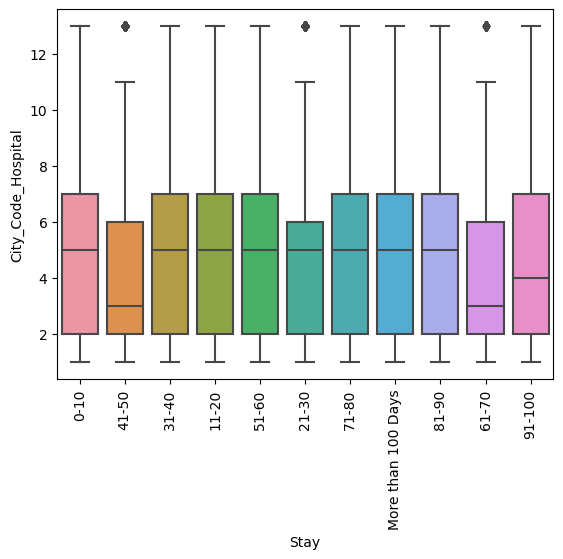

In [32]:
# City_Code_Hospital vs Stay
sns.boxplot(combine.Stay,combine.City_Code_Hospital)
plt.xticks(rotation=90)
plt.show()

# Hypothesis: From the below plot it seems like that City_code_hospital has some realation with target

In [33]:
# Lets prove the above hypothesis Statistically

# Ho: City_code_hospital has no correaltion with Target

# Ha: City_code_hospital has realtion with Target

stay_wise_city_code_hospital=combine.groupby(['Stay'])['City_Code_Hospital'].apply(list)
stats.f_oneway(*stay_wise_city_code_hospital)

# As the Pvalue is less than 0.05 so we reject the Null Hypothesis,That means City_code_Hospital has realtion with Target feature

F_onewayResult(statistic=105.27055113821098, pvalue=1.938323785570008e-219)

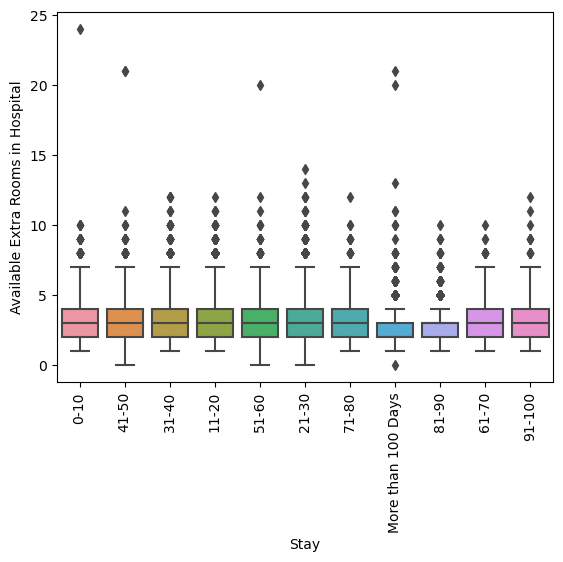

In [34]:
# Available Extra Rooms vs Stay
sns.boxplot(combine.Stay,combine['Available Extra Rooms in Hospital'])
plt.xticks(rotation=90)
plt.show()

# Inf: Available Extra rooms has some realation with Stay

In [35]:
# Lets prove the above hypothesis Statistically

# Ho: Available Extra Room has no correaltion with Target

# Ha: Available Extra Room has realtion with Target

stay_wise_avaliable_extra_room=combine.groupby(['Stay'])['Available Extra Rooms in Hospital'].apply(list)
stats.f_oneway(*stay_wise_avaliable_extra_room)

# As the p-value is less than 0.05 so we reject the Null hypothesis,That means Available Extra Room has realtion with Target


F_onewayResult(statistic=706.4474862062185, pvalue=0.0)

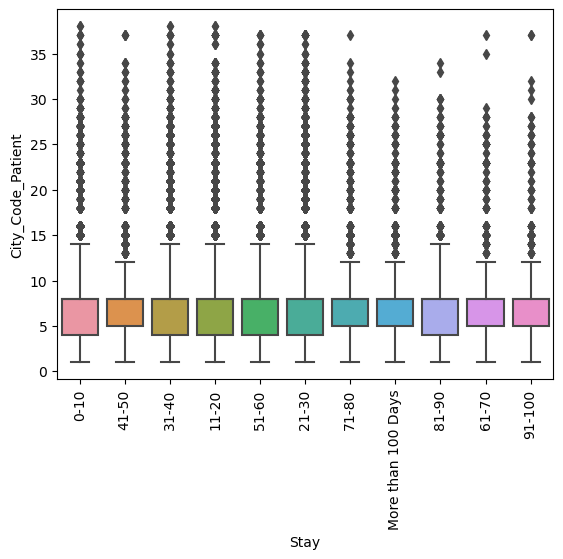

In [36]:
# City_Code_Patient vs Stay
sns.boxplot(combine.Stay,combine.City_Code_Patient)
plt.xticks(rotation=90)
plt.show()

# Hypothesis:It seems that  City_code_patients has no realation with Target
# As this column contains Missing value we will prove/verify the hypothesis after dealing with missing value

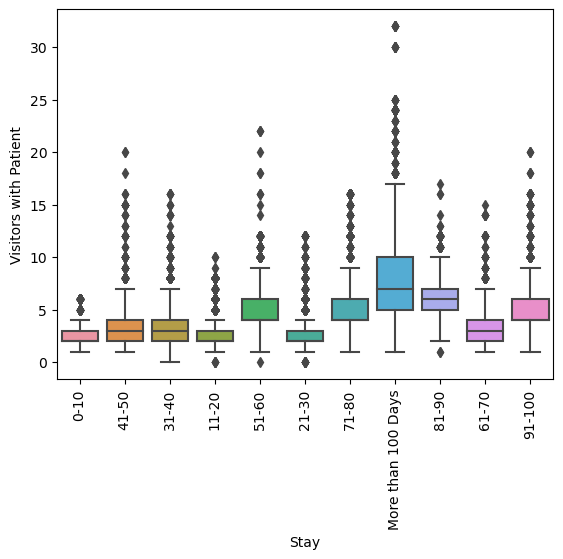

In [37]:
# Visitor with Paitient vs Stay
sns.boxplot(combine.Stay,combine['Visitors with Patient'])
plt.xticks(rotation=90)
plt.show()

In [38]:
# Ho: Visitors with paitent has no relation with Target

# Ha: Visitor with paitent has realation with Target

stay_wise_visitor=combine.groupby(['Stay'])['Visitors with Patient'].apply(list)
stats.f_oneway(*stay_wise_visitor)

# As pvalue is less than 0.05,so we reject the Null hypothesis,That means Visitor with paitents has relation with Target



F_onewayResult(statistic=15972.980813784263, pvalue=0.0)

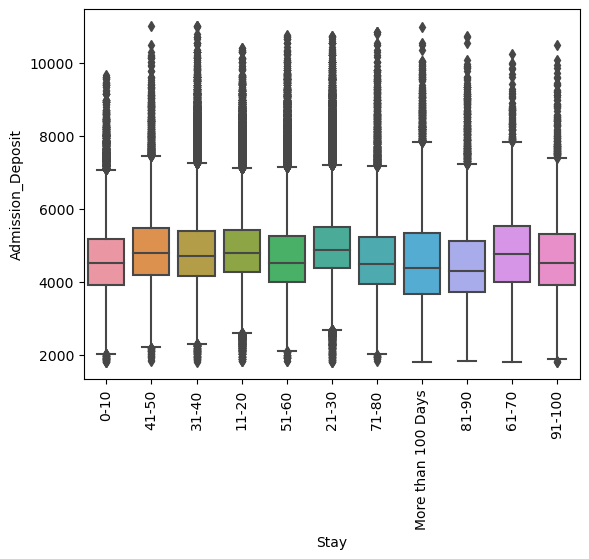

In [39]:
sns.boxplot(combine.Stay,combine['Admission_Deposit'])
plt.xticks(rotation=90)
plt.show()

In [40]:
# Ho: Admission Deposit  has no relation with Target

# Ha: Admission Deposit has realation with Target

stay_wise_Admission=combine.groupby(['Stay'])['Admission_Deposit'].apply(list)
stats.f_oneway(*stay_wise_Admission)

F_onewayResult(statistic=468.2240695134732, pvalue=0.0)

### Categoric Vs Categoric(Target):-

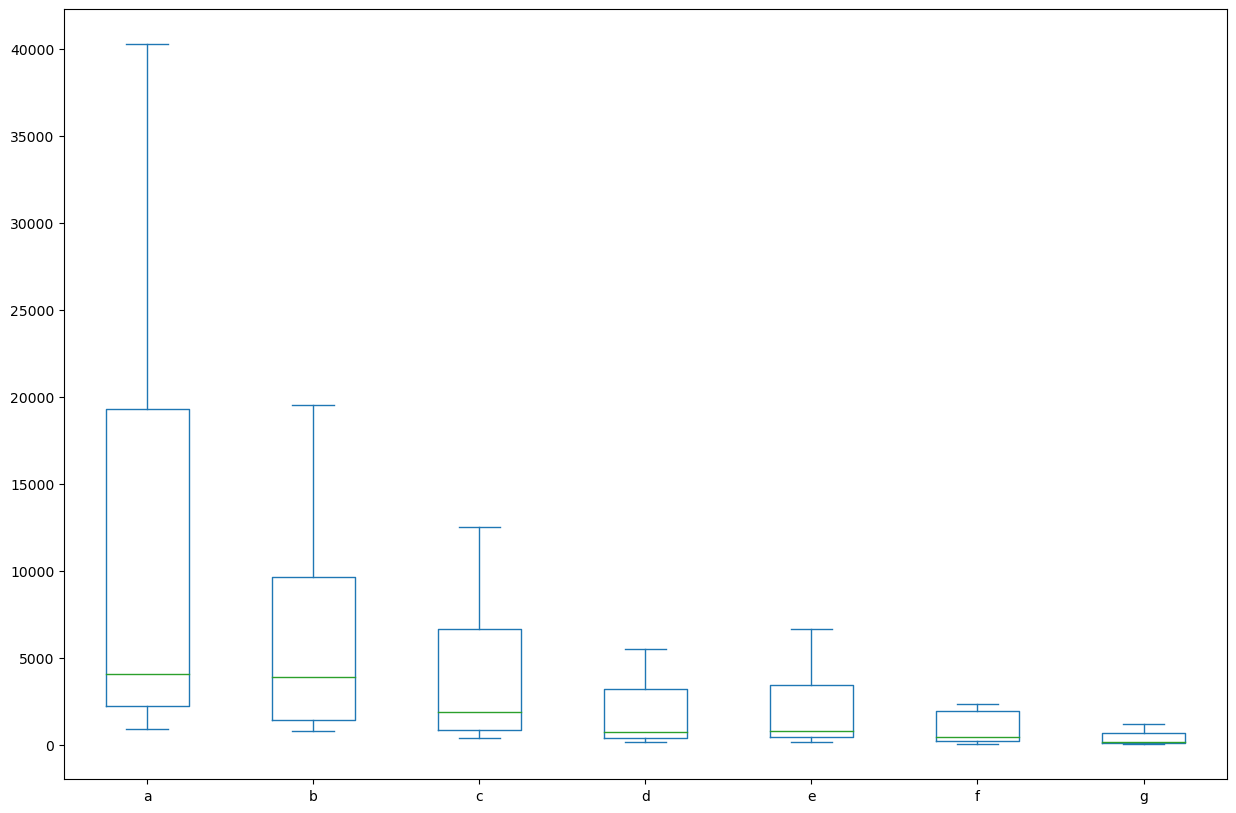

In [41]:
# Hospital_type_code Vs Stay
pd.crosstab(combine.Stay,combine.Hospital_type_code).plot(kind='box',figsize=(15,10))
plt.show()

In [42]:
pd.crosstab(combine.Stay,combine.Hospital_type_code)

Hospital_type_code,a,b,c,d,e,f,g
Stay,,,,,,,
0-10,10559,5145,3588,1314,1805,1023,170
11-20,39807,13933,10318,4423,6644,2332,682
21-30,40286,19541,12526,5527,6524,1897,1190
31-40,23974,12385,8222,3706,4060,2093,719
41-50,4111,3893,1872,760,764,204,139
51-60,14617,6909,5176,2713,2832,1960,811
61-70,924,917,430,186,197,44,46
71-80,3722,2608,1611,761,824,482,246
81-90,1890,1026,725,421,395,254,127


In [43]:
# Lets perform Statistical Test
# Cat vs Cat,we perform Chi square test
table=pd.crosstab(combine.Stay,combine.Hospital_type_code)

In [44]:
# Ho:Hospital Code and Stay are independent,No realtion

# Ha: Hospital code and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Hospital code and stay are dependent,Has relation.

(5540.640445301696,
 0.0,
 60,
 array([[1.06312805e+04, 5.11057532e+03, 3.40438174e+03, 1.51132075e+03,
         1.83605939e+03, 7.93352590e+02, 3.17029714e+02],
        [3.51939344e+04, 1.69181175e+04, 1.12699112e+04, 5.00309659e+03,
         6.07811577e+03, 2.62632512e+03, 1.04949944e+03],
        [3.94060906e+04, 1.89429480e+04, 1.26187410e+04, 5.60188796e+03,
         6.80556991e+03, 2.94065461e+03, 1.17510789e+03],
        [2.48437045e+04, 1.19426463e+04, 7.95552840e+03, 3.53172941e+03,
         4.29059481e+03, 1.85394575e+03, 7.40850787e+02],
        [5.28906655e+03, 2.54251339e+03, 1.69368136e+03, 7.51882712e+02,
         9.13440324e+02, 3.94693250e+02, 1.57722417e+02],
        [1.57721649e+04, 7.58185590e+03, 5.05061175e+03, 2.24213819e+03,
         2.72390814e+03, 1.17698784e+03, 4.70333271e+02],
        [1.23590212e+03, 5.94111959e+02, 3.95764425e+02, 1.75693278e+02,
         2.13444627e+02, 9.22284150e+01, 3.68551743e+01],
        [4.61841850e+03, 2.22012537e+03, 1.47892435e

<AxesSubplot:>

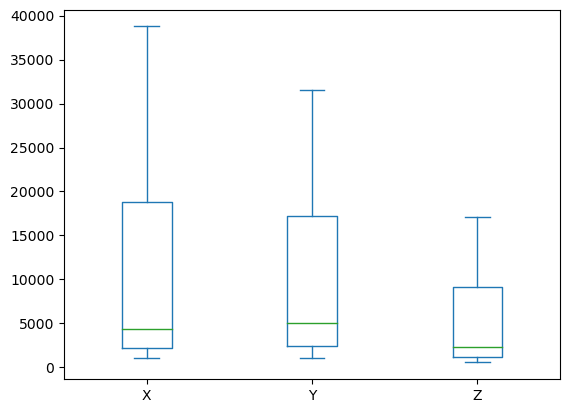

In [45]:
# Hospital_region_code Vs Stay

pd.crosstab(combine.Stay,combine.Hospital_region_code).plot(kind='box')

In [46]:
table=pd.crosstab(combine.Stay,combine.Hospital_region_code)

In [47]:
# Ho:Hospital_region_code and Stay are independent,No realtion

# Ha: Hospital_region_code and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Hospital_region_code and stay are dependent,Has relation.

(1216.5939805661988,
 2.1072422385422048e-245,
 20,
 array([[ 9883.44024268,  9074.89216739,  4645.66758992],
        [32718.27389947, 30041.64544433, 15379.0806562 ],
        [36634.13278566, 33637.15432203, 17219.71289231],
        [23096.1142326 , 21206.65891634, 10856.22685107],
        [ 4917.01570792,  4514.76269792,  2311.22159416],
        [14662.69744189, 13463.16615479,  6892.13640332],
        [ 1148.96458337,  1054.96967071,   540.06574592],
        [ 4293.54330827,  3942.29555518,  2018.16113655],
        [ 2025.76190028,  1860.0376337 ,   952.20046602],
        [ 1157.75767967,  1063.04341819,   544.19890214],
        [ 2798.29821818,  2569.37401943,  1315.32776239]]))

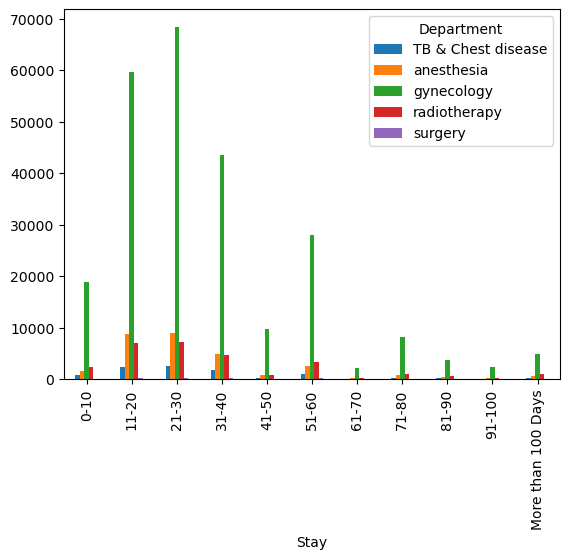

In [48]:
# Department Vs Stay
pd.crosstab(combine.Stay,combine.Department).plot(kind='bar')
plt.show()

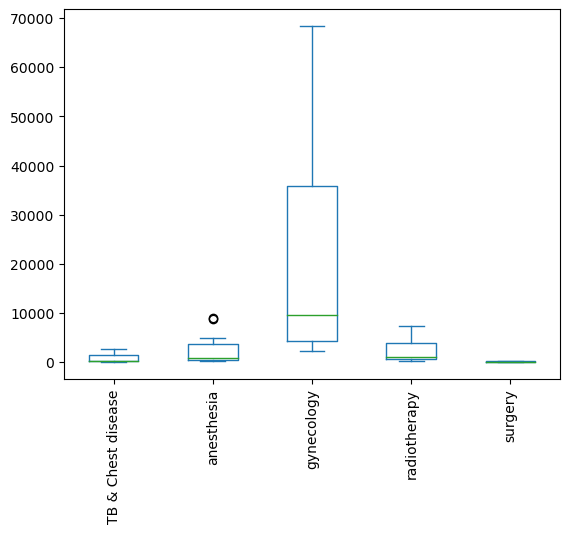

In [49]:
pd.crosstab(combine.Stay,combine.Department).plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [50]:
table=pd.crosstab(combine.Stay,combine.Department)
# Ho:Department and Stay are independent,No realtion

# Ha: Department and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Department and stay are dependent,Has relation.

(1618.9225961803502,
 0.0,
 40,
 array([[7.10555725e+02, 2.19771194e+03, 1.84929799e+04, 2.11372909e+03,
         8.90233075e+01],
        [2.35223326e+03, 7.27533526e+03, 6.12194102e+04, 6.99731729e+03,
         2.94703958e+02],
        [2.63375830e+03, 8.14607760e+03, 6.85464035e+04, 7.83478528e+03,
         3.29975352e+02],
        [1.66046192e+03, 5.13572247e+03, 4.32153144e+04, 4.93946716e+03,
         2.08034088e+02],
        [3.53501774e+02, 1.09336262e+03, 9.20026535e+03, 1.05158112e+03,
         4.42891332e+01],
        [1.05415355e+03, 3.26044216e+03, 2.74354843e+04, 3.13584838e+03,
         1.32071606e+02],
        [8.26031567e+01, 2.55487272e+02, 2.14983634e+03, 2.45724141e+02,
         1.03490915e+01],
        [3.08678123e+02, 9.54725397e+02, 8.03368142e+03, 9.18241743e+02,
         3.86733179e+01],
        [1.45639239e+02, 4.50454600e+02, 3.79041844e+03, 4.33241033e+02,
         1.82466854e+01],
        [8.32353237e+01, 2.57442532e+02, 2.16628917e+03, 2.47604683e+02,
    

<AxesSubplot:>

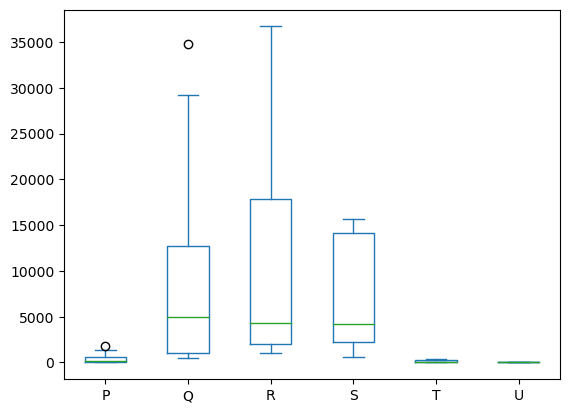

In [51]:
# Ward_Type Vs Stay
pd.crosstab(combine.Stay,combine.Ward_Type).plot(kind='box')
plt.subplot()

In [52]:
table=pd.crosstab(combine.Stay,combine.Ward_Type)
# Ho:Ward_Type and Stay are independent,No realtion

# Ha: Ward_Type and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Ward_Type and stay are dependent,Has relation.

(18451.43294170703,
 0.0,
 50,
 array([[3.74031315e+02, 7.86940836e+03, 9.48398429e+03, 5.76642730e+03,
         1.09481620e+02, 6.67118874e-01],
        [1.23819831e+03, 2.60509956e+04, 3.13959095e+04, 1.90892587e+04,
         3.62429431e+02, 2.20843932e+00],
        [1.38639103e+03, 2.91688869e+04, 3.51535023e+04, 2.13739405e+04,
         4.05806490e+02, 2.47275451e+00],
        [8.74054962e+02, 1.83896245e+04, 2.21626457e+04, 1.34752738e+04,
         2.55842089e+02, 1.55895653e+00],
        [1.86080738e+02, 3.91503399e+03, 4.71828620e+03, 2.86880002e+03,
         5.44671522e+01, 3.31891922e-01],
        [5.54898687e+02, 1.16747561e+04, 1.40700797e+04, 8.55485304e+03,
         1.62422782e+02, 9.89712283e-01],
        [4.34816950e+01, 9.14830391e+02, 1.10252724e+03, 6.70355724e+02,
         1.27274006e+01, 7.75535583e-02],
        [1.62485897e+02, 3.41861182e+03, 4.12001249e+03, 2.50503921e+03,
         4.75607748e+01, 2.89808377e-01],
        [7.66634258e+01, 1.61295533e+03, 1.943887

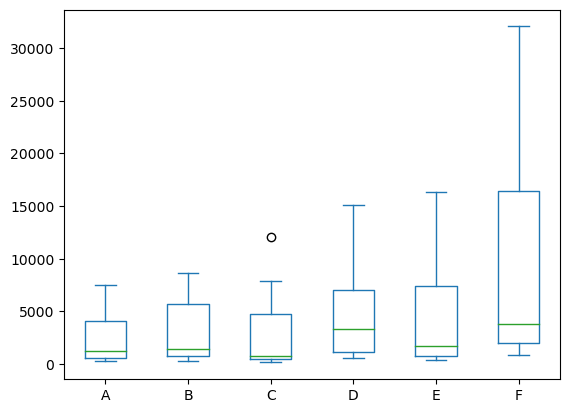

In [53]:
# Ward_Facility_Code Vs Stay
pd.crosstab(combine.Stay,combine.Ward_Facility_Code).plot(kind='box')
plt.show()

In [54]:

table=pd.crosstab(combine.Stay,combine.Ward_Facility_Code)
# Ho:Ward_Facility_Code and Stay are independent,No realtion

# Ha: Ward_Facility_code and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Ward_Facility_Code and stay are dependent,Has relation.

(7507.470145092705,
 0.0,
 50,
 array([[ 2068.51325533,  2605.9145705 ,  2628.67073653,  3840.30686036,
          4102.85519944,  8357.73937784],
        [ 6847.63418311,  8626.65474598,  8701.98706499, 12713.00363336,
         13582.14719663, 27667.57317594],
        [ 7667.18747763,  9659.12860902,  9743.47701279, 14234.54870022,
         15207.71497434, 30978.943226  ],
        [ 4833.80455222,  6089.6306471 ,  6142.80838656,  8974.21988268,
          9587.75588655, 19530.7806449 ],
        [ 1029.08622087,  1296.44360284,  1307.76480508,  1910.55429   ,
          2041.17219993,  4157.97888129],
        [ 3068.76788574,  3866.03611378,  3899.79629944,  5697.33374158,
          6086.84050898, 12399.22545048],
        [  240.46773312,   302.94143287,   305.58687091,   446.44136692,
           476.96300065,   971.59959553],
        [  898.59917472,  1132.05592297,  1141.94160873,  1668.29802348,
          1782.35372035,  3630.75154975],
        [  423.97335745,   534.12195781,   538.78

<AxesSubplot:xlabel='Stay'>

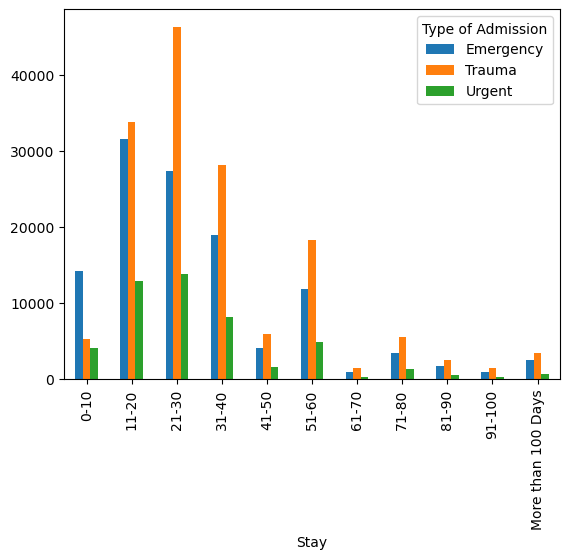

In [55]:
#  Type of Admission vs Stay
pd.crosstab(combine.Stay,combine['Type of Admission']).plot(kind='bar')

<AxesSubplot:>

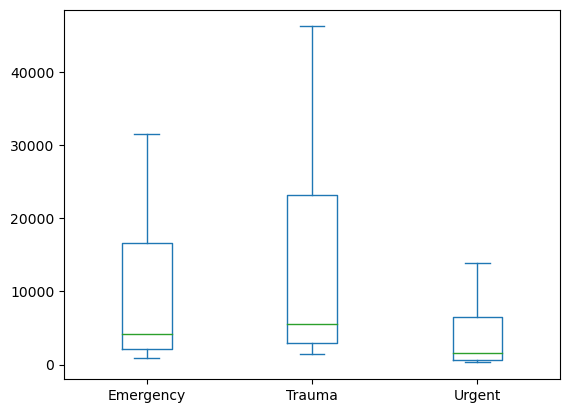

In [56]:
pd.crosstab(combine.Stay,combine['Type of Admission']).plot(kind='box')

In [57]:

table=pd.crosstab(combine.Stay,combine['Type of Admission'])
# Ho:Type_of_Admission and Stay are independent,No realtion

# Ha: Type_of_Admission  and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Ward_Facility_Code and stay are dependent,Has relation.

(9632.544342702113,
 0.0,
 20,
 array([[ 8722.65340192, 11286.24298608,  3595.10361201],
        [28875.58948367, 37362.13102394, 11901.2794924 ],
        [32331.53994184, 41833.78601486, 13325.6740433 ],
        [20383.52986767, 26374.2533837 ,  8401.21674863],
        [ 4339.52376287,  5614.91066707,  1788.56557006],
        [12940.59806933, 16743.84243715,  5333.55949353],
        [ 1014.02139192,  1312.04248237,   417.93612571],
        [ 3789.27673205,  4902.94592354,  1561.77734441],
        [ 1787.84092351,  2313.28772948,   736.87134701],
        [ 1021.78175971,  1322.08362381,   421.13461647],
        [ 2469.64466552,  3195.47372801,  1017.88160647]]))

<AxesSubplot:xlabel='Stay'>

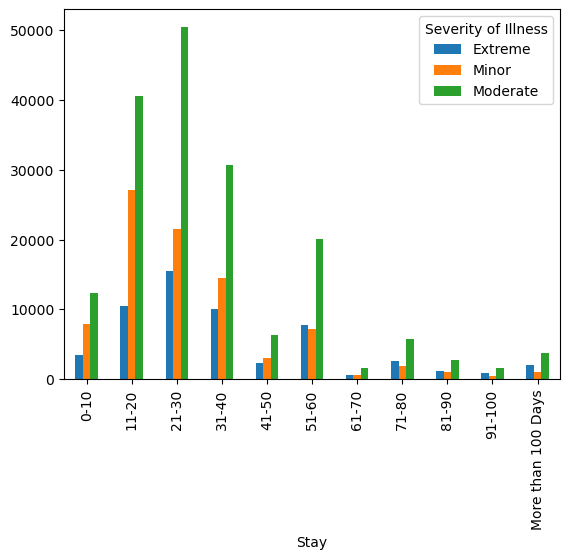

In [58]:
# 'Severity of Illness' Vs Stay
pd.crosstab(combine.Stay,combine['Severity of Illness']).plot(kind='bar')

<AxesSubplot:>

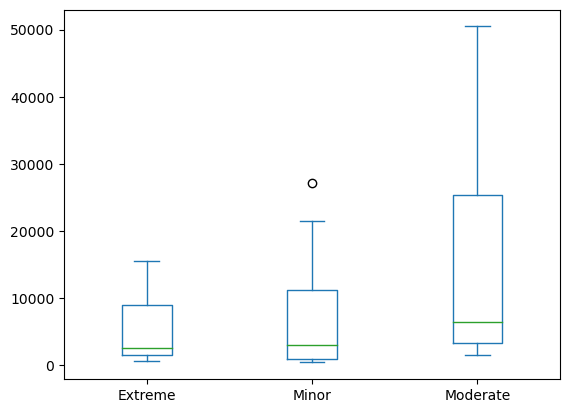

In [59]:
pd.crosstab(combine.Stay,combine['Severity of Illness']).plot(kind='box')

In [60]:

table=pd.crosstab(combine.Stay,combine['Severity of Illness'])
# Ho:Severity of Illness and Stay are independent,No realtion

# Ha: Severity of Illness  and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Severity of illness and stay are dependent,Has relation.

(6616.481596269036,
 0.0,
 20,
 array([[ 4204.55376557,  6365.20354983, 13034.2426846 ],
        [13918.81150177, 21071.4556931 , 43148.73280513],
        [15584.67266155, 23593.37501178, 48312.95232667],
        [ 9825.41014891, 14874.52391988, 30459.0659312 ],
        [ 2091.76727966,  3166.6914627 ,  6484.54125764],
        [ 6237.71664814,  9443.17479698, 19337.10855488],
        [  488.78560976,   739.96435099,  1515.25003925],
        [ 1826.5333974 ,  2765.15832909,  5662.30827351],
        [  861.78745627,  1304.64560134,  2671.56694239],
        [  492.52631595,   745.62734347,  1526.84634057],
        [ 1190.43521502,  1802.17994084,  3690.38484415]]))

<AxesSubplot:>

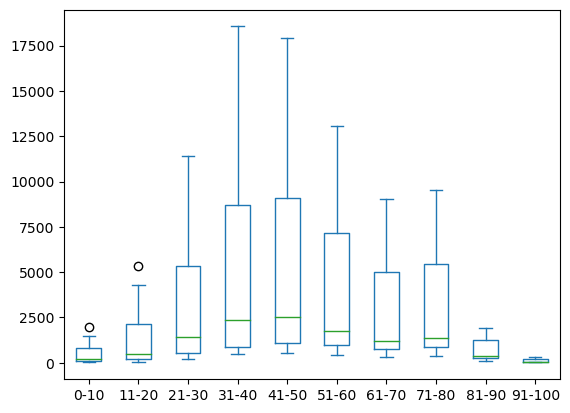

In [61]:
# Age vs Stay
pd.crosstab(combine.Stay,combine.Age).plot(kind='box')

In [62]:

table=pd.crosstab(combine.Stay,combine.Age)
# Ho:Age and Stay are independent,No realtion

# Ha: Age and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Age and stay are dependent,Has relation.

(3652.8901912117676,
 0.0,
 90,
 array([[4.63573493e+02, 1.24291659e+03, 3.02745957e+03, 4.71719756e+03,
         4.72535123e+03, 3.59606723e+03, 2.49702595e+03, 2.65305764e+03,
         5.84840880e+02, 9.65098638e+01],
        [1.53461994e+03, 4.11456783e+03, 1.00221430e+04, 1.56158744e+04,
         1.56428665e+04, 1.19044695e+04, 8.26618837e+03, 8.78271779e+03,
         1.93606514e+03, 3.19487555e+02],
        [1.71828963e+03, 4.60701640e+03, 1.12216347e+04, 1.74848471e+04,
         1.75150697e+04, 1.33292458e+04, 9.25552012e+03, 9.83386993e+03,
         2.16778145e+03, 3.57725152e+02],
        [1.08330157e+03, 2.90450924e+03, 7.07471796e+03, 1.10233816e+04,
         1.10424355e+04, 8.40346857e+03, 5.83517430e+03, 6.19979691e+03,
         1.36668523e+03, 2.25529045e+02],
        [2.30628009e+02, 6.18351528e+02, 1.50616242e+03, 2.34680778e+03,
         2.35086424e+03, 1.78904497e+03, 1.24227147e+03, 1.31989730e+03,
         2.90958585e+02, 4.80136981e+01],
        [6.87740069e+02, 1.8

<AxesSubplot:xlabel='Stay'>

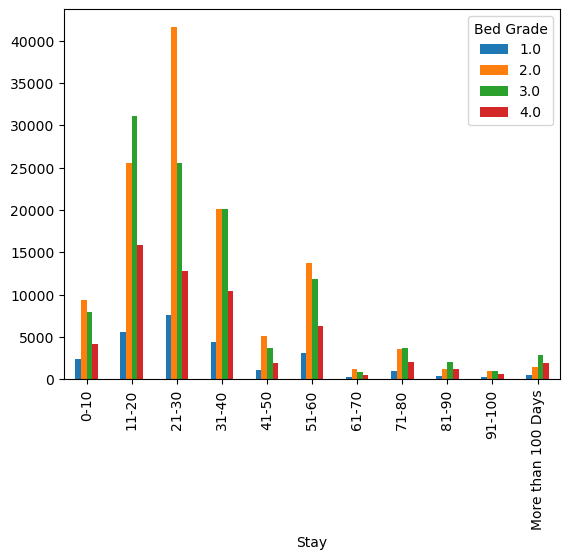

In [63]:
# Bed Grade vs Stay
pd.crosstab(combine.Stay,combine['Bed Grade']).plot(kind='bar')

<AxesSubplot:>

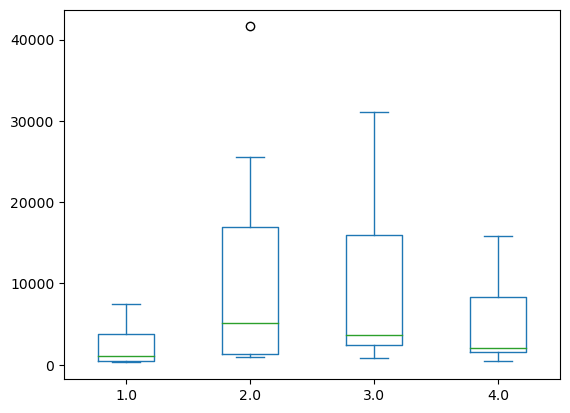

In [64]:
pd.crosstab(combine.Stay,combine['Bed Grade']).plot(kind='box')

In [65]:

table=pd.crosstab(combine.Stay,combine['Bed Grade'])
# Ho:Bed_Grade and Stay are independent,No realtion

# Ha: Bed Grade and stay are dependent,Has relation
stats.chi2_contingency(table)


# As pvalue is <0.05,so reject the null hypothesis,That means Bed grade and stay are dependent,Has relation.

(6780.830012823463,
 0.0,
 30,
 array([[ 1965.19597895,  9169.50582581,  8199.1045818 ,  4268.19361345],
        [ 6504.58053876, 30350.04639912, 27138.1260033 , 14127.24705882],
        [ 7281.76633943, 33976.3563465 , 30380.66655776, 15815.2107563 ],
        [ 4590.92495091, 21421.02545198, 19154.05598366,  9970.99361345],
        [  977.10256813,  4559.11155266,  4076.62453467,  2122.16134454],
        [ 2914.65491243, 13599.63356632, 12160.39555486,  6330.31596639],
        [  228.14324982,  1064.50495563,   951.84927354,   495.50252101],
        [  853.45558784,  3982.18094715,  3560.75001963,  1853.61344538],
        [  402.7477735 ,  1879.20090159,  1680.32661902,   874.72470588],
        [  230.14158486,  1073.82908663,   960.18663944,   499.84268908],
        [  556.28651535,  2595.60496662,  2320.91423231,  1208.19428571]]))

In [66]:
cat_cols=['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Bed Grade']

In [67]:
for i in cat_cols:
    table=pd.crosstab(combine.Stay,combine[i])
    test_stats,pvalue,dof,_=stats.chi2_contingency(table)
    if pvalue<0.05:
        print('Pvalue of %s'%i,'=',pvalue)

Pvalue of Hospital_type_code = 0.0
Pvalue of Hospital_region_code = 2.1072422385422048e-245
Pvalue of Department = 0.0
Pvalue of Ward_Type = 0.0
Pvalue of Ward_Facility_Code = 0.0
Pvalue of Type of Admission = 0.0
Pvalue of Severity of Illness = 0.0
Pvalue of Age = 0.0
Pvalue of Bed Grade = 0.0


### Feature Engineering

In [68]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [69]:
len(combine.Hospital_code.unique())

32

In [70]:
# count of caseid registered in a hospital  by each hospital code
combine['Noc_reg_hospital']=combine.groupby(['Hospital_code'])['case_id'].transform('nunique')


In [71]:
# Lest check the Number of Patient from each Hospital Region
combine['Nop_region_wise']=combine.groupby(['Hospital_region_code'])['patientid'].transform('nunique')


In [72]:
len(combine.City_Code_Hospital.unique())

11

In [73]:
combine[combine.Hospital_code==10]['Hospital_type_code'].unique()

array(['e'], dtype=object)

In [74]:
combine.groupby(['Hospital_type_code'])['Hospital_code'].unique()
# we have to find out on the logic,that on what basis its make the hospital code into 7 different categories

Hospital_type_code
a    [23, 6, 29, 12, 27, 19, 5, 14, 13, 24, 4, 7]
b                                [26, 28, 11, 20]
c                   [8, 2, 16, 3, 21, 31, 15, 30]
d                                      [1, 9, 18]
e                                    [10, 17, 25]
f                                            [32]
g                                            [22]
Name: Hospital_code, dtype: object

In [75]:
combine.groupby(['Hospital_type_code','Hospital_code'])['City_Code_Hospital'].unique()

Hospital_type_code  Hospital_code
a                   4                 [4]
                    5                 [1]
                    6                 [6]
                    7                 [4]
                    12                [9]
                    13                [5]
                    14                [1]
                    19                [7]
                    23                [6]
                    24                [1]
                    27                [7]
                    29                [4]
b                   11                [2]
                    20                [2]
                    26                [2]
                    28               [11]
c                   2                 [5]
                    3                 [3]
                    8                 [3]
                    15                [5]
                    16                [3]
                    21                [3]
                    30                [3]


In [76]:
combine.groupby(['Hospital_type_code'])['Hospital_code'].unique()

Hospital_type_code
a    [23, 6, 29, 12, 27, 19, 5, 14, 13, 24, 4, 7]
b                                [26, 28, 11, 20]
c                   [8, 2, 16, 3, 21, 31, 15, 30]
d                                      [1, 9, 18]
e                                    [10, 17, 25]
f                                            [32]
g                                            [22]
Name: Hospital_code, dtype: object

In [77]:
combine[(combine.Hospital_code==22)&(combine.Hospital_type_code=='g')]['Ward_Facility_Code'].unique()

array(['B'], dtype=object)

In [78]:
combine[(combine.Hospital_code==32)&(combine.Hospital_type_code=='f')]['Ward_Facility_Code'].unique()

array(['B'], dtype=object)

In [79]:
combine[(combine.Hospital_code==12)&(combine.Hospital_type_code=='a')]['Ward_Facility_Code'].unique()

array(['B'], dtype=object)

In [80]:
combine.groupby(['Hospital_type_code'])['Ward_Facility_Code'].unique()

Hospital_type_code
a    [F, B, C, E]
b          [D, F]
c          [F, A]
d          [B, F]
e             [E]
f             [B]
g             [B]
Name: Ward_Facility_Code, dtype: object

In [81]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Noc_reg_hospital,Nop_region_wise
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,5284,46710
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,7277,46710
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,13538,85223
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,47523,83131
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,47523,83131


In [82]:
#Number of facility available in each hospital type_code
combine['Now_facilty_htc_wise']=combine.groupby(['Hospital_type_code'])['Ward_Facility_Code'].transform('nunique')

In [83]:
combine.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [84]:
combine.groupby(['Hospital_type_code'])

In [85]:
# Lets Calculate Number of Hospitals in Each City
combine['NoH_each_city']=combine.groupby(['City_Code_Hospital'])['Hospital_code'].transform('nunique')

In [86]:
combine.Hospital_region_code.unique()

array(['Z', 'X', 'Y'], dtype=object)

In [87]:
# Number of City in each Region
combine.groupby(['Hospital_region_code'])['City_Code_Hospital'].unique()

Hospital_region_code
X        [1, 6, 4, 11]
Y    [2, 9, 10, 7, 13]
Z               [3, 5]
Name: City_Code_Hospital, dtype: object

In [88]:
# Number of city in each region
combine['count_of_city_region_wise']=combine.groupby(['Hospital_region_code'])['City_Code_Hospital'].transform('nunique')

In [89]:
#Number of case_id reg Region wise
combine['Noc_reg_region_wise']=combine.groupby(['Hospital_region_code'])['case_id'].transform('nunique')

In [90]:
#count of Hospital in each region,Number of Hospital present in each region
combine['Noh_region_wise']=combine.groupby(['Hospital_region_code'])['Hospital_code'].transform('nunique')

In [91]:
pd.set_option('display.max_columns',100)

In [92]:
# Lets calculate Total number of Extra room available in each Hospital code(doubt)
combine.groupby(['Hospital_code'])['Available Extra Rooms in Hospital'].transform('sum')

0          18193
1          19518
2          41808
3         156536
4         156536
           ...  
455490     85502
455491     40926
455492     24870
455493     24495
455494    100081
Name: Available Extra Rooms in Hospital, Length: 455495, dtype: int64

In [93]:
pd.set_option('display.max_rows',1000)

In [94]:
combine.groupby(['Department'])['Available Extra Rooms in Hospital'].sum()
# Total Number of Rooms Available in Each Departments/Department wise (doubt)

Department
TB & Chest disease      41645
anesthesia             119428
gynecology            1165095
radiotherapy           124564
surgery                  5094
Name: Available Extra Rooms in Hospital, dtype: int64

In [95]:
# Number of Ward available/ward present in Each Hospital
combine['Now_each_hospital']=combine.groupby(['Hospital_code'])['Ward_Type'].transform('nunique')

In [96]:
combine.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [97]:
# Number of Ward in Each Department
combine['Now_dept_wise']=combine.groupby(['Department'])['Ward_Type'].transform('nunique')

In [98]:
combine.groupby(['Ward_Type'])['Ward_Facility_Code'].unique()

Ward_Type
P       [C, D, E, F, A]
Q    [F, B, D, E, C, A]
R    [F, D, B, A, C, E]
S    [F, E, D, B, A, C]
T                   [B]
U                   [F]
Name: Ward_Facility_Code, dtype: object

In [99]:
combine.groupby(['Ward_Type'])['Bed Grade'].unique()

Ward_Type
P         [3.0, 2.0, 1.0, 4.0]
Q    [3.0, 2.0, 1.0, 4.0, nan]
R    [2.0, 4.0, 1.0, 3.0, nan]
S    [2.0, 3.0, 4.0, 1.0, nan]
T         [3.0, 2.0, 1.0, 4.0]
U              [3.0, 1.0, 2.0]
Name: Bed Grade, dtype: object

In [100]:
combine.groupby('Hospital_type_code')['Department'].unique().to_list()
# Each Hospital_type_code contains same departments

[array(['anesthesia', 'radiotherapy', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 array(['radiotherapy', 'gynecology', 'anesthesia', 'TB & Chest disease',
        'surgery'], dtype=object),
 array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
        'surgery'], dtype=object),
 array(['gynecology', 'radiotherapy', 'TB & Chest disease', 'anesthesia',
        'surgery'], dtype=object),
 array(['anesthesia', 'gynecology', 'radiotherapy', 'TB & Chest disease',
        'surgery'], dtype=object),
 array(['radiotherapy', 'gynecology', 'TB & Chest disease', 'anesthesia',
        'surgery'], dtype=object),
 array(['radiotherapy', 'gynecology', 'anesthesia', 'TB & Chest disease',
        'surgery'], dtype=object)]

In [101]:
# Lets calculate Total number Extra  rooms available in each hospital
combine['Total_extra_room_available']=combine.groupby(['Hospital_code'])['Available Extra Rooms in Hospital'].transform('sum')

In [102]:
combine[(combine.Hospital_code==8)&(combine.Hospital_type_code=='c')&(combine.City_Code_Hospital==3)]['Available Extra Rooms in Hospital'].sum()

18193

In [103]:
#combine.groupby(['Department','Ward_Type','Ward_Facility_Code'])['Bed Grade'].unique()

F_onewayResult(statistic=1999.441121056996, pvalue=0.0)

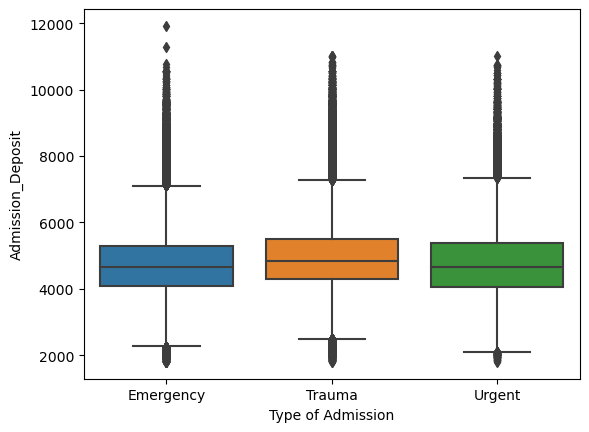

In [104]:
# From this below plot we can see that their is a relation of Admission_Deposit amount with Type of Admission
sns.boxplot(combine['Type of Admission'],combine.Admission_Deposit)
stats.f_oneway(*combine.groupby(['Type of Admission'])['Admission_Deposit'].apply(list))

F_onewayResult(statistic=1142.0671678254198, pvalue=0.0)

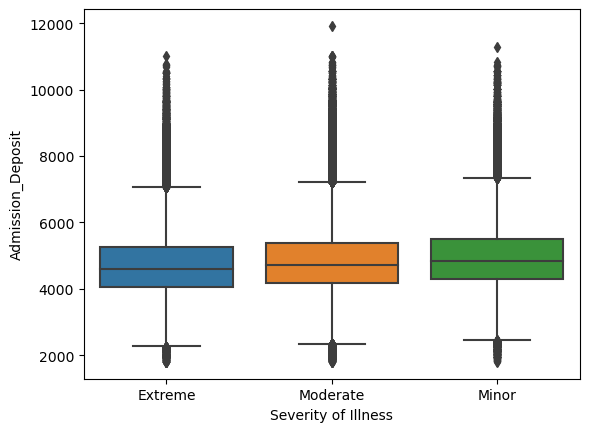

In [105]:
sns.boxplot(combine['Severity of Illness'],combine.Admission_Deposit)
stats.f_oneway(*combine.groupby(['Severity of Illness'])['Admission_Deposit'].apply(list))

In [106]:
combine.groupby(['Severity of Illness'])['Admission_Deposit'].mean()

Severity of Illness
Extreme     4745.918406
Minor       4978.710009
Moderate    4870.470821
Name: Admission_Deposit, dtype: float64

In [107]:
combine.groupby(['Type of Admission','Severity of Illness'])['Admission_Deposit'].mean()

Type of Admission  Severity of Illness
Emergency          Extreme                4614.964013
                   Minor                  4896.156981
                   Moderate               4741.928539
Trauma             Extreme                4859.601623
                   Minor                  5082.051824
                   Moderate               4979.884904
Urgent             Extreme                4661.523772
                   Minor                  4915.068169
                   Moderate               4816.507511
Name: Admission_Deposit, dtype: float64

In [108]:
# Number paitent in each hospital/count of paitent in each hospital
combine['Nop_each_hospital']=combine.groupby(['Hospital_code'])['patientid'].transform('nunique')


In [109]:
# Number of paitent each city wise/count of paitent per city
combine['Nop_city_wise']=combine.groupby(['City_Code_Hospital'])['patientid'].transform('nunique')

In [110]:
# Count of paitent in each hospital wrt to departments
combine['Nop_each_hosp_wrt_dept']=combine.groupby(['Hospital_code','Department'])['patientid'].transform('nunique')

In [111]:
combine['Type of Admission'].unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

<AxesSubplot:xlabel='Visitors with Patient'>

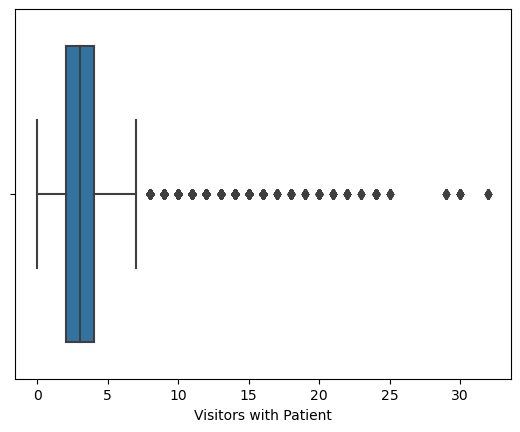

In [112]:
sns.boxplot(combine['Visitors with Patient'])
# As per below plot we can see that in some case number of visitor with paitent are high which is not acceptable
# in a practical scenario,we think that the entry of data for this columns might be wrong,so we replace all the vistor count
# wich is greater than 3 with the value 3(as per practical hospital scenario)

In [113]:
def number(x):
    if x>3:
        return 3
    else:
        return x

In [114]:
combine['Visitors with Patient']=combine['Visitors with Patient'].apply(number)

<AxesSubplot:xlabel='Visitors with Patient'>

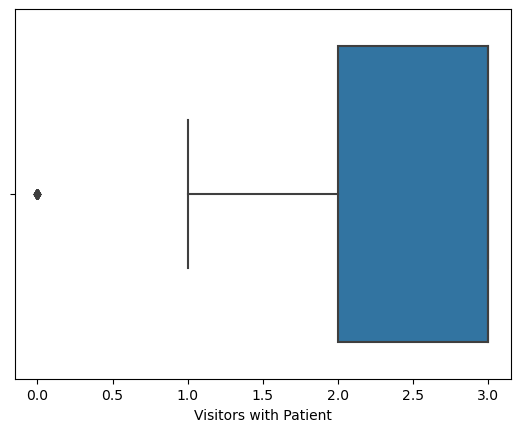

In [115]:
sns.boxplot(combine['Visitors with Patient'])

In [117]:
# Number of paitent in each hospital according to each admission type

combine['Nop_ad_hosp_type']=combine.groupby(['Hospital_code','Type of Admission'])['patientid'].transform('nunique')

In [118]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Noc_reg_hospital,Nop_region_wise,Now_facilty_htc_wise,NoH_each_city,count_of_city_region_wise,Noc_reg_region_wise,Noh_region_wise,Now_each_hospital,Now_dept_wise,Total_extra_room_available,Nop_each_hospital,Nop_city_wise,Nop_each_hosp_wrt_dept,Nop_ad_hosp_type
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,5284,46710,2,6,2,89939,10,4,5,18193,5114,30606,333,1840
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,7277,46710,2,4,2,89939,10,2,5,19518,6134,27535,579,3229
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,13538,85223,1,6,4,190849,12,3,5,41808,12886,47554,1082,6462
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866


In [131]:
# Lets deal with the Age
age=pd.DataFrame(combine.Age.str.split('-').to_list(),columns=['min_age','max_age'])

In [134]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455495 entries, 0 to 455494
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   min_age  455495 non-null  object
 1   max_age  455495 non-null  object
dtypes: object(2)
memory usage: 7.0+ MB


In [138]:
age.min_age=age.min_age.astype(float)
age.max_age=age.max_age.astype(float)

In [139]:
age['Avg_age']=(age.min_age+age.max_age)/2

In [141]:
combine['Avg_age']=age.Avg_age

<AxesSubplot:xlabel='Severity of Illness', ylabel='Avg_age'>

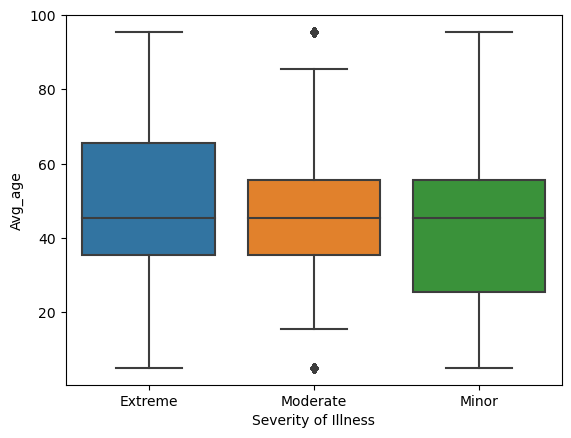

In [145]:
sns.boxplot(combine['Severity of Illness'],combine.Avg_age)

<AxesSubplot:xlabel='Type of Admission', ylabel='Avg_age'>

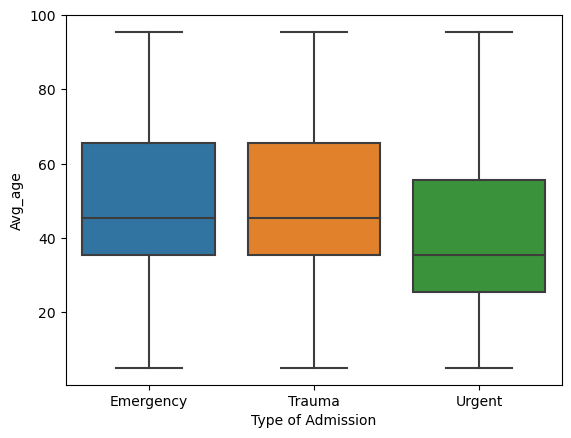

In [146]:
sns.boxplot(combine['Type of Admission'],combine.Avg_age)

In [154]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Noc_reg_hospital,Nop_region_wise,Now_facilty_htc_wise,NoH_each_city,count_of_city_region_wise,Noc_reg_region_wise,Noh_region_wise,Now_each_hospital,Now_dept_wise,Total_extra_room_available,Nop_each_hospital,Nop_city_wise,Nop_each_hosp_wrt_dept,Nop_ad_hosp_type,Avg_age
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,5284,46710,2,6,2,89939,10,4,5,18193,5114,30606,333,1840,55.5
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,7277,46710,2,4,2,89939,10,2,5,19518,6134,27535,579,3229,55.5
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,13538,85223,1,6,4,190849,12,3,5,41808,12886,47554,1082,6462,55.5
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5


In [155]:
# Lets make a cluster of Severity of illness,Avg_age,Type_of admmsiion
data=combine.loc[:,['Severity of Illness','Type of Admission','Avg_age']]

In [156]:
data.head()

,Severity of Illness,Type of Admission,Avg_age
0,Extreme,Emergency,55.5
1,Extreme,Trauma,55.5
2,Extreme,Trauma,55.5
3,Extreme,Trauma,55.5
4,Extreme,Trauma,55.5


In [160]:
data['Severity of Illness']=pd.factorize(data['Severity of Illness'])[0]

In [161]:
data['Type of Admission']=pd.factorize(data['Type of Admission'])[0]

In [162]:
data.head()

,Severity of Illness,Type of Admission,Avg_age
0,0,0,55.5
1,0,1,55.5
2,0,1,55.5
3,0,1,55.5
4,0,1,55.5


In [168]:
#lets apply Kmeans clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmean=KMeans(random_state=12)
kelbow=KElbowVisualizer(kmean)

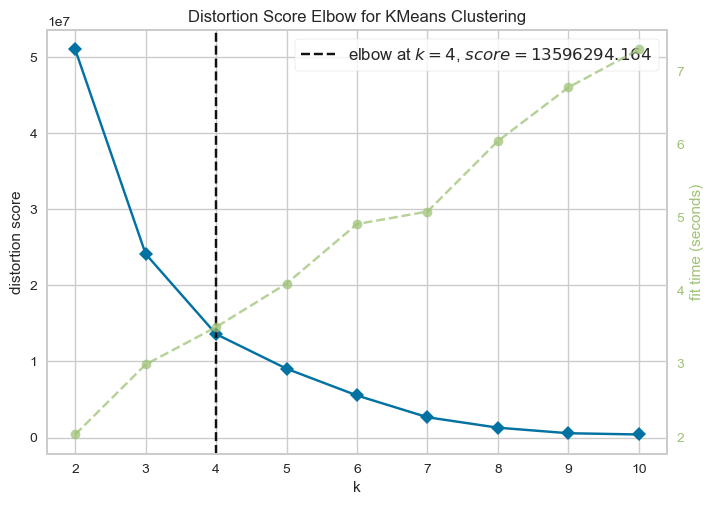

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [169]:
kelbow.fit(data)
kelbow.show()
# So lets take k=4

In [171]:
kmean=KMeans(n_clusters=4,random_state=12)

In [172]:
kmean.fit(data)

KMeans(n_clusters=4, random_state=12)

In [174]:
combine['Ilness_k_cluster']=pd.Series(kmean.labels_)

In [175]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Noc_reg_hospital,Nop_region_wise,Now_facilty_htc_wise,NoH_each_city,count_of_city_region_wise,Noc_reg_region_wise,Noh_region_wise,Now_each_hospital,Now_dept_wise,Total_extra_room_available,Nop_each_hospital,Nop_city_wise,Nop_each_hosp_wrt_dept,Nop_ad_hosp_type,Avg_age,Ilness_k_cluster
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,5284,46710,2,6,2,89939,10,4,5,18193,5114,30606,333,1840,55.5,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,7277,46710,2,4,2,89939,10,2,5,19518,6134,27535,579,3229,55.5,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,13538,85223,1,6,4,190849,12,3,5,41808,12886,47554,1082,6462,55.5,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5,0


<AxesSubplot:xlabel='Ilness_k_cluster'>

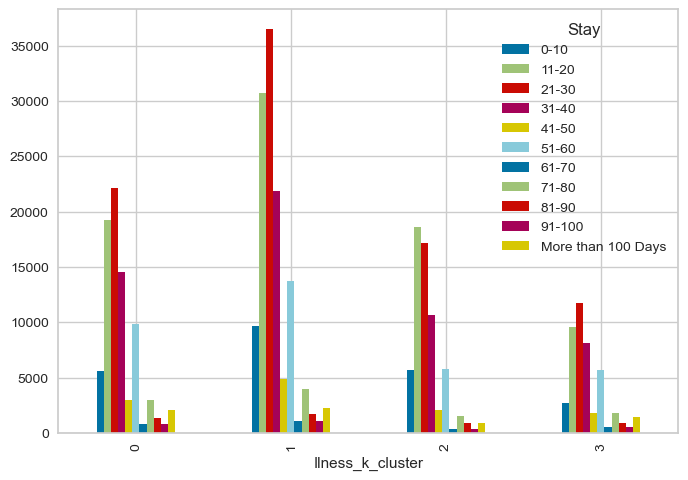

In [177]:
pd.crosstab(combine.Ilness_k_cluster,combine.Stay).plot(kind='bar')
# So as we can see the clustering effect has craete more sense with target,so we go with this cluster labels and 
# drop the existing variables from which the cluster has been formed

In [178]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Noc_reg_hospital,Nop_region_wise,Now_facilty_htc_wise,NoH_each_city,count_of_city_region_wise,Noc_reg_region_wise,Noh_region_wise,Now_each_hospital,Now_dept_wise,Total_extra_room_available,Nop_each_hospital,Nop_city_wise,Nop_each_hosp_wrt_dept,Nop_ad_hosp_type,Avg_age,Ilness_k_cluster
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,5284,46710,2,6,2,89939,10,4,5,18193,5114,30606,333,1840,55.5,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,7277,46710,2,4,2,89939,10,2,5,19518,6134,27535,579,3229,55.5,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,13538,85223,1,6,4,190849,12,3,5,41808,12886,47554,1082,6462,55.5,0
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5,0
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5,0


In [180]:
# Lets make a cluster of Hospital_code,Hospital_type_code,City_code_Hospital,Hospital_region_code
data=combine.loc[:,['Hospital_code','Hospital_type_code','City_Code_Hospital','Hospital_region_code']]

In [182]:
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code
0,8,c,3,Z
1,2,c,5,Z
2,10,e,1,X
3,26,b,2,Y
4,26,b,2,Y


In [184]:
data.Hospital_type_code=pd.factorize(data.Hospital_type_code)[0]
data.Hospital_region_code=pd.factorize(data.Hospital_region_code)[0]

In [186]:
data.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code
0,8,0,3,0
1,2,0,5,0
2,10,1,1,1
3,26,2,2,2
4,26,2,2,2


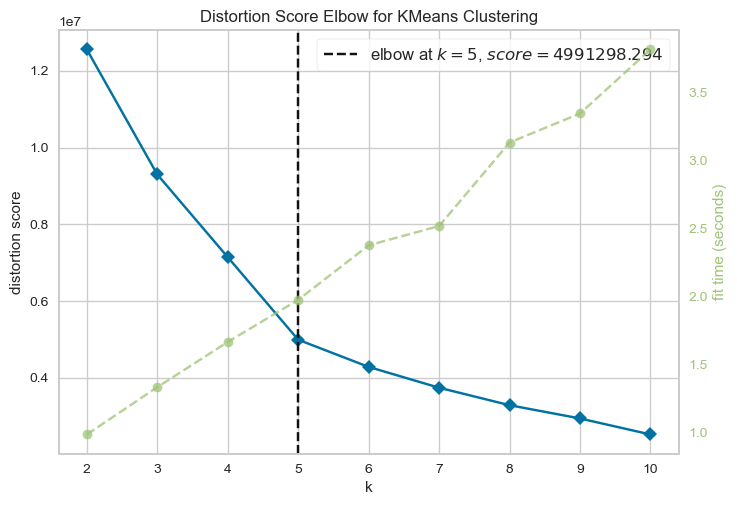

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [187]:
kmean=KMeans(random_state=12)
kelbow=KElbowVisualizer(kmean)
kelbow.fit(data)
kelbow.show()
# So as per the below plot the optimal k value is 5

In [189]:
kmean=KMeans(n_clusters=5,random_state=12)
kmean.fit(data)

KMeans(n_clusters=5, random_state=12)

In [191]:
combine['Hospital_k_cluster']=pd.Series(kmean.labels_)

<AxesSubplot:xlabel='Hospital_k_cluster'>

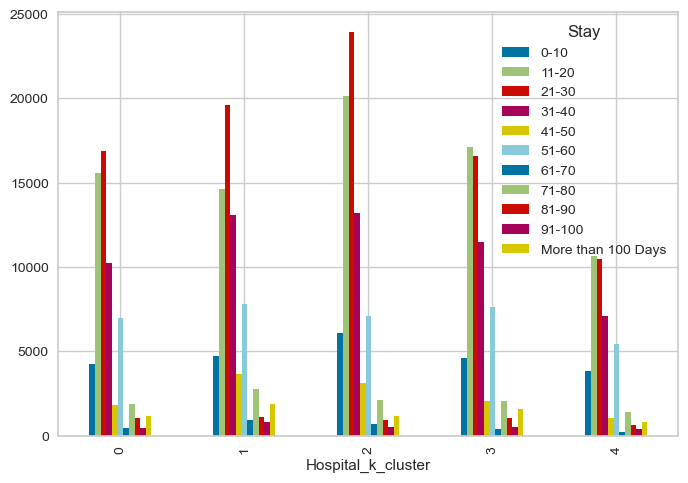

In [193]:
pd.crosstab(combine.Hospital_k_cluster,combine.Stay).plot(kind='bar')
# So as we can see the clustering effect has craete more sense with target,so we go with this cluster labels and 
# drop the existing variables from which the cluster has been formed

In [198]:
# Lets Verify the above created clustering variable Statistically
table=pd.crosstab(combine.Ilness_k_cluster,combine.Stay)
stats.chi2_contingency(table)

(2971.9775143667875,
 0.0,
 30,
 array([[ 6093.09317355, 20170.65783292, 22584.76592304, 14238.6428724 ,
          3031.31643522,  9039.48215351,   708.33111626,  2646.94871215,
          1248.87242729,   713.75201766,  1725.137336  ],
        [ 9442.54879129, 31258.74089148, 34999.91680641, 22065.81718262,
          4697.67202407, 14008.6075908 ,  1097.71029839,  4102.01217191,
          1935.39446925,  1106.11114251,  2673.46863126],
        [ 4733.94965425, 15671.33079281, 17546.94073886, 11062.52876541,
          2355.14195856,  7023.10832878,   550.3286668 ,  2056.51244512,
           970.2952223 ,   554.54036579,  1340.32306132],
        [ 3334.40838091, 11038.27048279, 12359.3765317 ,  7792.01117957,
          1658.86958215,  4946.80192691,   387.62991854,  1448.52667081,
           683.43788116,   390.59647404,   944.07097143]]))

In [199]:
table=pd.crosstab(combine.Hospital_k_cluster,combine.Stay)
stats.chi2_contingency(table)

(3527.1694509969648,
 0.0,
 40,
 array([[ 4512.09556648, 14936.90202802, 16724.61248972, 10544.08910997,
          2244.76945591,  6693.97401064,   524.53780014,  1960.13505926,
           924.8228415 ,   528.55212004,  1277.50951834],
        [ 5276.31729881, 17466.7919595 , 19557.29015381, 12329.96042558,
          2624.97009151,  7827.74441493,   613.37970971,  2292.12665574,
          1081.46174766,   618.07394218,  1493.88360058],
        [ 5859.74981629, 19398.19483542, 21719.85134626, 13693.35452113,
          2915.22801613,  8693.3027905 ,   681.20460498,  2545.58018201,
          1201.04514537,   686.41790553,  1659.0708364 ],
        [ 4836.38946357, 16010.44891941, 17926.64593108, 11301.9152017 ,
          2406.1058071 ,  7175.08414825,   562.23744654,  2101.01413148,
           991.29182447,   566.54028414,  1369.32684227],
        [ 3119.44785484, 10326.66225765, 11562.60007914,  7289.68074162,
          1551.92662936,  4627.89463569,   362.64043864,  1355.14397151,
      

In [200]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Noc_reg_hospital,Nop_region_wise,Now_facilty_htc_wise,NoH_each_city,count_of_city_region_wise,Noc_reg_region_wise,Noh_region_wise,Now_each_hospital,Now_dept_wise,Total_extra_room_available,Nop_each_hospital,Nop_city_wise,Nop_each_hosp_wrt_dept,Nop_ad_hosp_type,Avg_age,Ilness_k_cluster,Hospital_k_cluster
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,5284,46710,2,6,2,89939,10,4,5,18193,5114,30606,333,1840,55.5,0,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,7277,46710,2,4,2,89939,10,2,5,19518,6134,27535,579,3229,55.5,0,0
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,13538,85223,1,6,4,190849,12,3,5,41808,12886,47554,1082,6462,55.5,0,2
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5,0,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,47523,83131,2,3,5,174707,10,4,5,156536,37279,51590,4227,19866,55.5,0,1


In [ ]:
# Check the Individual Column's Strength with the Target...
# Generate the Cluster Count.
# Which of these columns mentioned above has a good correlation with Target
# Keep them and discard the rest.

# This way we wlll get 2 types of columns - One with High Correl with tgt and another one as cluster...

In [201]:
combine.shape

(455495, 35)

In [202]:
# Lets make a cluster of Department','Ward_Type','Ward_Facility_Code','Bed Grade'

data=combine.loc[:,['Department','Ward_Type','Ward_Facility_Code','Bed Grade']]

In [203]:
data.head()

,Department,Ward_Type,Ward_Facility_Code,Bed Grade
0,radiotherapy,R,F,2.0
1,radiotherapy,S,F,2.0
2,anesthesia,S,E,2.0
3,radiotherapy,R,D,2.0
4,radiotherapy,S,D,2.0


In [ ]:
data.Department=pd.factorize(data.Department)[0]

In [204]:
combine.isnull().sum()

case_id                                   0
Hospital_code                             0
Hospital_type_code                        0
City_Code_Hospital                        0
Hospital_region_code                      0
Available Extra Rooms in Hospital         0
Department                                0
Ward_Type                                 0
Ward_Facility_Code                        0
Bed Grade                               148
patientid                                 0
City_Code_Patient                      6689
Type of Admission                         0
Severity of Illness                       0
Visitors with Patient                     0
Age                                       0
Admission_Deposit                         0
Stay                                 137057
Noc_reg_hospital                          0
Nop_region_wise                           0
Now_facilty_htc_wise                      0
NoH_each_city                             0
count_of_city_region_wise       

# DONT RUN BELOW#########

In [154]:
len(combine.City_Code_Hospital.unique())

11

In [155]:
len(combine.Hospital_type_code.unique())

7

In [123]:
from sklearn.cluster import KMeans
kmean=KMeans()

In [140]:
X['Hospital_type_code']=pd.Series(pd.factorize(combine.Hospital_type_code)[0])
X['Hospital_region_code']=pd.Series(pd.factorize(combine.Hospital_region_code)[0])

In [148]:
X.head()

,Hospital_code,City_Code_Hospital,Hospital_type_code,Hospital_region_code,Labels
0,8,3,0,0,7
1,2,5,0,0,3
2,10,1,1,1,7
3,26,2,2,2,4
4,26,2,2,2,4


In [142]:
kmean.fit(X)

KMeans()

In [147]:
X['Labels']=pd.Series(kmean.labels_)

<AxesSubplot:xlabel='Hospital_code', ylabel='City_Code_Hospital'>

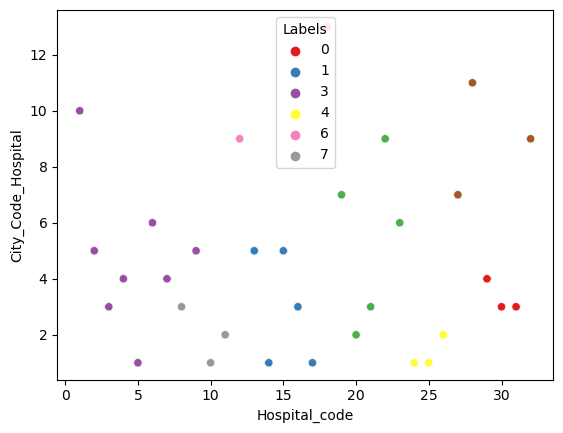

In [152]:
sns.scatterplot(x=X['Hospital_code'],y=X['City_Code_Hospital'],hue=X.Labels,palette=plt.cm.Set1)

In [70]:
# Statistoically Verification of the above feature with Target
# Ho: Features is not significant
# Ha: Feature is significant
stats.f_oneway(*combine.groupby(['Stay'])['Nop_region_wise'].apply(list))

F_onewayResult(statistic=16.53988685650043, pvalue=2.5327848189706045e-30)

In [71]:
pd.set_option('display.max_rows',5000000)

In [72]:
# Number of Cases Handled by each Department
combine['noc_dept_wise']=combine.groupby(['Department'])['case_id'].transform('nunique')

In [73]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Nop_region_wise,noc_dept_wise
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,46710,41033
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,46710,41033
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,85223,42358
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,83131,41033
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,83131,41033


In [74]:
pd.set_option('display.max_columns',50)

In [75]:
combine['count_of_illness']=combine.groupby(['Hospital_code'])['Severity of Illness'].transform('count')

In [76]:
combine['No_of_Hospital_visited_per_patient']=combine.groupby(['patientid'])['Hospital_code'].transform('nunique')
# Number of different Hospital visited per patient

In [77]:
combine['No_of_Hospitalvisit_per_patient']=combine.groupby('patientid')['patientid'].transform('count')
# No.of hospital visit per patient

In [78]:
combine['Type_adm_per_patient']=combine.groupby(['patientid'])['Type of Admission'].transform('nunique')
# count of Type of admission for each paitent id
combine['No_of_city_visited_per_patient']=combine.groupby(['patientid'])['City_Code_Hospital'].transform('nunique')


In [79]:
combine['Avg_Extra_rooms_available']=combine.groupby(['Hospital_code'])['Available Extra Rooms in Hospital'].transform('nunique')
combine['Max_No_of_rooms_available']=combine.groupby(['Hospital_code'])['Available Extra Rooms in Hospital'].transform('max')
combine['Avg_Bed_Grade']=combine.groupby(['Hospital_code'])['Bed Grade'].transform('mean')

In [80]:
combine.Type_adm_per_patient.unique()

array([3, 2, 1], dtype=int64)

<AxesSubplot:xlabel='Type_adm_per_patient'>

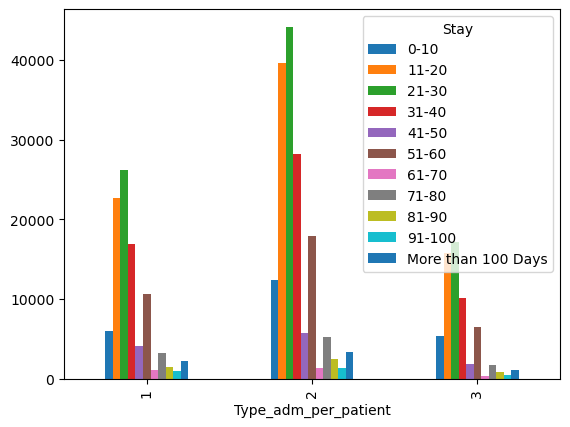

In [81]:
pd.crosstab(combine.Type_adm_per_patient,combine.Stay).plot(kind='bar')

In [82]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Nop_region_wise,noc_dept_wise,count_of_illness,No_of_Hospital_visited_per_patient,No_of_Hospitalvisit_per_patient,Type_adm_per_patient,No_of_city_visited_per_patient,Avg_Extra_rooms_available,Max_No_of_rooms_available,Avg_Bed_Grade
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,46710,41033,5284,10,14,3,7,8,8,2.584974
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,46710,41033,7277,10,14,3,7,8,8,2.660162
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,85223,42358,13538,10,14,3,7,9,8,2.641897
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,83131,41033,47523,10,14,3,7,15,21,2.603624
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,83131,41033,47523,10,14,3,7,15,21,2.603624


In [83]:
# Number of CaseId registerd in Hospital region code wise
combine['Nocid_regn_wise']=combine.groupby(['Hospital_region_code'])['case_id'].transform('nunique')


In [84]:
dict1=combine.groupby(by=['Hospital_region_code','Hospital_code'])['Hospital_code'].count().to_dict()

In [85]:
dict1

{('X', 4): 1749,
 ('X', 5): 7448,
 ('X', 6): 29221,
 ('X', 7): 1871,
 ('X', 10): 13538,
 ('X', 14): 24715,
 ('X', 17): 7844,
 ('X', 23): 38220,
 ('X', 24): 11467,
 ('X', 25): 14046,
 ('X', 28): 24572,
 ('X', 29): 16158,
 ('Y', 1): 7460,
 ('Y', 11): 24827,
 ('Y', 12): 16170,
 ('Y', 18): 5228,
 ('Y', 19): 30036,
 ('Y', 20): 1962,
 ('Y', 22): 6006,
 ('Y', 26): 47523,
 ('Y', 27): 20243,
 ('Y', 32): 15252,
 ('Z', 2): 7277,
 ('Z', 3): 10277,
 ('Z', 8): 5284,
 ('Z', 9): 16360,
 ('Z', 13): 7432,
 ('Z', 15): 13326,
 ('Z', 16): 5244,
 ('Z', 21): 11784,
 ('Z', 30): 7215,
 ('Z', 31): 5740}

In [86]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Nop_region_wise,noc_dept_wise,count_of_illness,No_of_Hospital_visited_per_patient,No_of_Hospitalvisit_per_patient,Type_adm_per_patient,No_of_city_visited_per_patient,Avg_Extra_rooms_available,Max_No_of_rooms_available,Avg_Bed_Grade,Nocid_regn_wise
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,46710,41033,5284,10,14,3,7,8,8,2.584974,89939
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,46710,41033,7277,10,14,3,7,8,8,2.660162,89939
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,85223,42358,13538,10,14,3,7,9,8,2.641897,190849
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,83131,41033,47523,10,14,3,7,15,21,2.603624,174707
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,83131,41033,47523,10,14,3,7,15,21,2.603624,174707


In [ ]:
combine.City_Code_Hospital.unique()

In [ ]:
combine.Hospital_code.unique()

In [ ]:
combine[combine.Hospital_code==2]['City_Code_Hospital'].count()

In [131]:
combine.Hospital_type_code.unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [106]:
combine.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Nop_region_wise,noc_dept_wise,count_of_illness,No_of_Hospital_visited_per_patient,No_of_Hospitalvisit_per_patient,Type_adm_per_patient,No_of_city_visited_per_patient,Avg_Extra_rooms_available,Max_No_of_rooms_available,Avg_Bed_Grade,Nocid_regn_wise
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,46710,41033,5284,10,14,3,7,8,8,2.584974,89939
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,46710,41033,7277,10,14,3,7,8,8,2.660162,89939
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,85223,42358,13538,10,14,3,7,9,8,2.641897,190849
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,83131,41033,47523,10,14,3,7,15,21,2.603624,174707
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,83131,41033,47523,10,14,3,7,15,21,2.603624,174707


In [100]:
combine.groupby(['Hospital_type_code'])['Admission_Deposit'].max()

Hospital_type_code
a    11920.0
b    11293.0
c    10842.0
d    10399.0
e    10670.0
f    10662.0
g     9873.0
Name: Admission_Deposit, dtype: float64

In [94]:
combine[combine.Hospital_code==32]['Department'].unique()

array(['radiotherapy', 'gynecology', 'TB & Chest disease', 'anesthesia',
       'surgery'], dtype=object)

In [107]:
combine.shape

(455495, 29)